In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import joblib

## Load Dataset

In [7]:
df = pd.read_csv("medical_data.csv")

In [8]:
df.head(10)

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
5  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
6  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
7  Fungal infection     itching              skin_rash    dischromic _patches   
8  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
9  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   
5                   NaN       NaN       NaN       NaN       NaN       NaN   
6                   NaN       NaN       NaN       NaN       NaN       NaN   
7                   NaN       NaN       NaN       NaN       NaN       NaN   
8                   NaN       NaN       NaN       NaN       NaN       NaN   
9   dischromic _patches       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN        NaN        NaN   
7        NaN        NaN        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN        NaN        NaN   
9        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN        NaN  
7        NaN        NaN  
8        NaN        NaN  
9        NaN        NaN

In [9]:
disease = df.iloc[:, 0]
df = df.drop(df.columns[0], axis=1)
df[disease.name] = disease 
df

Symptom_1              Symptom_2              Symptom_3  \
0                  itching              skin_rash   nodal_skin_eruptions   
1                skin_rash   nodal_skin_eruptions    dischromic _patches   
2                  itching   nodal_skin_eruptions    dischromic _patches   
3                  itching              skin_rash    dischromic _patches   
4                  itching              skin_rash   nodal_skin_eruptions   
...                    ...                    ...                    ...   
4915              vomiting               headache                 nausea   
4916             skin_rash     pus_filled_pimples             blackheads   
4917   burning_micturition     bladder_discomfort    foul_smell_of urine   
4918             skin_rash             joint_pain           skin_peeling   
4919             skin_rash             high_fever                blister   

                      Symptom_4              Symptom_5            Symptom_6  \
0           dischromic _patches                    NaN                  NaN   
1                           NaN                    NaN                  NaN   
2                           NaN                    NaN                  NaN   
3                           NaN                    NaN                  NaN   
4                           NaN                    NaN                  NaN   
...                         ...                    ...                  ...   
4915         spinning_movements        loss_of_balance         unsteadiness   
4916                   scurring                    NaN                  NaN   
4917   continuous_feel_of_urine                    NaN                  NaN   
4918        silver_like_dusting   small_dents_in_nails   inflammatory_nails   
4919       red_sore_around_nose      yellow_crust_ooze                  NaN   

     Symptom_7 Symptom_8 Symptom_9 Symptom_10 Symptom_11 Symptom_12  \
0          NaN       NaN       NaN        NaN        NaN        NaN   
1          NaN       NaN       NaN        NaN        NaN        NaN   
2          NaN       NaN       NaN        NaN        NaN        NaN   
3          NaN       NaN       NaN        NaN        NaN        NaN   
4          NaN       NaN       NaN        NaN        NaN        NaN   
...        ...       ...       ...        ...        ...        ...   
4915       NaN       NaN       NaN        NaN        NaN        NaN   
4916       NaN       NaN       NaN        NaN        NaN        NaN   
4917       NaN       NaN       NaN        NaN        NaN        NaN   
4918       NaN       NaN       NaN        NaN        NaN        NaN   
4919       NaN       NaN       NaN        NaN        NaN        NaN   

     Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  \
0           NaN        NaN        NaN        NaN        NaN   
1           NaN        NaN        NaN        NaN        NaN   
2           NaN        NaN        NaN        NaN        NaN   
3           NaN        NaN        NaN        NaN        NaN   
4           NaN        NaN        NaN        NaN        NaN   
...         ...        ...        ...        ...        ...   
4915        NaN        NaN        NaN        NaN        NaN   
4916        NaN        NaN        NaN        NaN        NaN   
4917        NaN        NaN        NaN        NaN        NaN   
4918        NaN        NaN        NaN        NaN        NaN   
4919        NaN        NaN        NaN        NaN        NaN   

                                      Disease  
0                            Fungal infection  
1                            Fungal infection  
2                            Fungal infection  
3                            Fungal infection  
4                            Fungal infection  
...                                       ...  
4915  (vertigo) Paroymsal  Positional Vertigo  
4916                                     Acne  
4917                  Urinary tract infection  
4918                                Psoriasis  
4919             

In [10]:
df.shape

(4920, 18)

In [11]:
symptom_cols = df.columns[:17]

In [12]:
all_symptoms = df[symptom_cols].values.ravel()

In [13]:
unique_symptoms = pd.Series(all_symptoms).dropna().unique()
unique_symptoms = sorted(unique_symptoms)
unique_symptoms

[' abdominal_pain',
 ' abnormal_menstruation',
 ' acidity',
 ' acute_liver_failure',
 ' altered_sensorium',
 ' anxiety',
 ' back_pain',
 ' belly_pain',
 ' blackheads',
 ' bladder_discomfort',
 ' blister',
 ' blood_in_sputum',
 ' bloody_stool',
 ' blurred_and_distorted_vision',
 ' breathlessness',
 ' brittle_nails',
 ' bruising',
 ' burning_micturition',
 ' chest_pain',
 ' chills',
 ' cold_hands_and_feets',
 ' coma',
 ' congestion',
 ' constipation',
 ' continuous_feel_of_urine',
 ' continuous_sneezing',
 ' cough',
 ' cramps',
 ' dark_urine',
 ' dehydration',
 ' depression',
 ' diarrhoea',
 ' dischromic _patches',
 ' distention_of_abdomen',
 ' dizziness',
 ' drying_and_tingling_lips',
 ' enlarged_thyroid',
 ' excessive_hunger',
 ' extra_marital_contacts',
 ' family_history',
 ' fast_heart_rate',
 ' fatigue',
 ' fluid_overload',
 ' foul_smell_of urine',
 ' headache',
 ' high_fever',
 ' hip_joint_pain',
 ' history_of_alcohol_consumption',
 ' increased_appetite',
 ' indigestion',
 ' inflam

## Exploratory Data Analysis (EDA)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symptom_1   4920 non-null   object
 1   Symptom_2   4920 non-null   object
 2   Symptom_3   4920 non-null   object
 3   Symptom_4   4572 non-null   object
 4   Symptom_5   3714 non-null   object
 5   Symptom_6   2934 non-null   object
 6   Symptom_7   2268 non-null   object
 7   Symptom_8   1944 non-null   object
 8   Symptom_9   1692 non-null   object
 9   Symptom_10  1512 non-null   object
 10  Symptom_11  1194 non-null   object
 11  Symptom_12  744 non-null    object
 12  Symptom_13  504 non-null    object
 13  Symptom_14  306 non-null    object
 14  Symptom_15  240 non-null    object
 15  Symptom_16  192 non-null    object
 16  Symptom_17  72 non-null     object
 17  Disease     4920 non-null   object
dtypes: object(18)
memory usage: 692.0+ KB


### Univariante Analysis

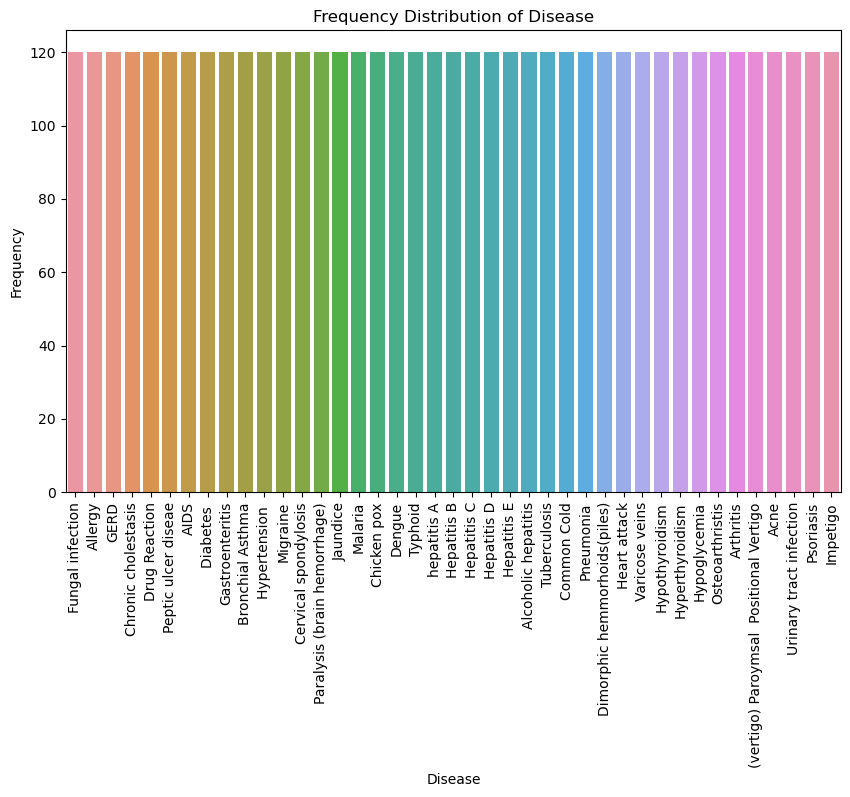

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x=df['Disease'])
plt.title(f"Frequency Distribution of Disease")
plt.xticks(rotation=90)
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.show()

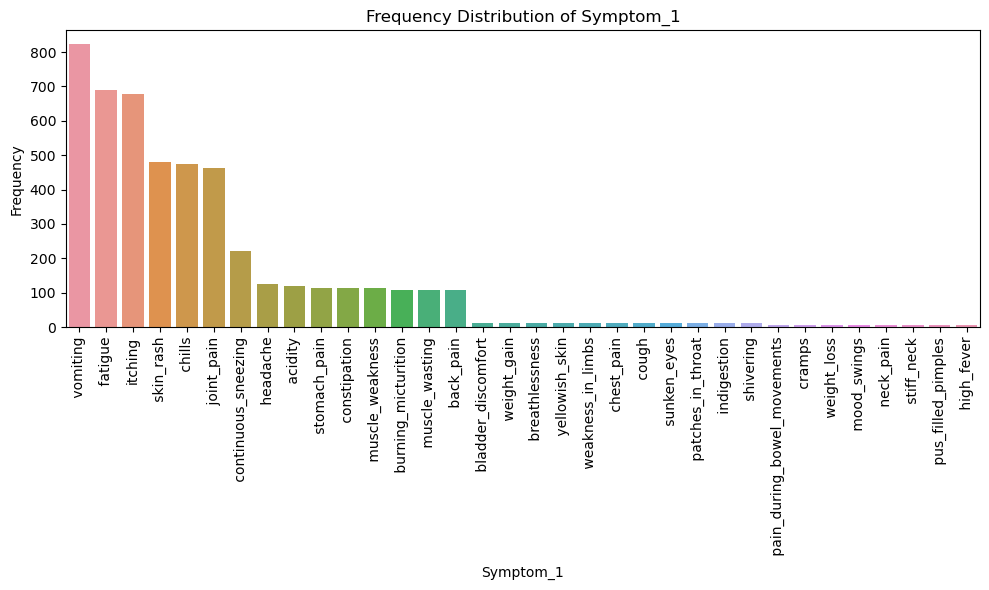

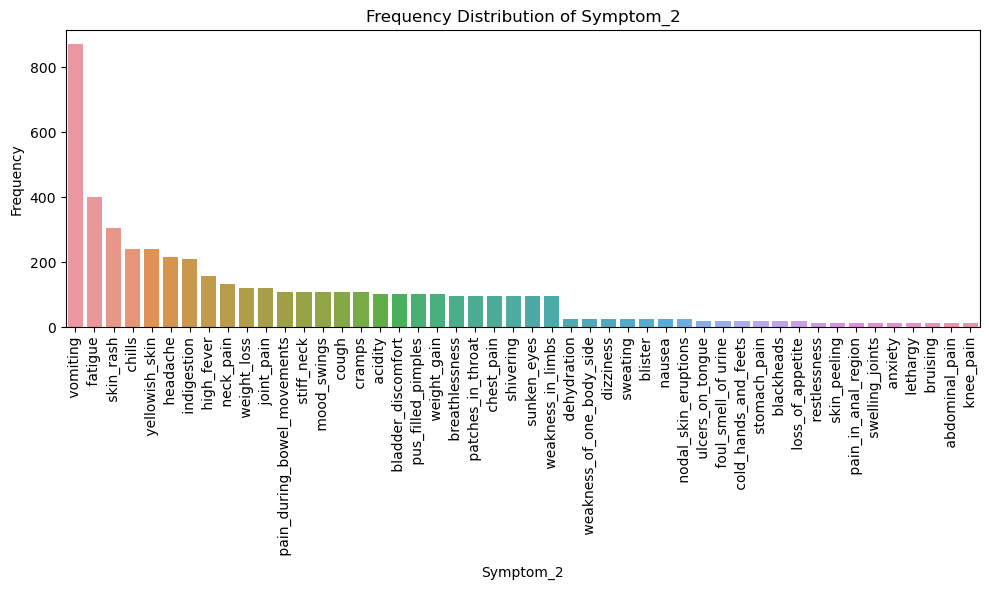

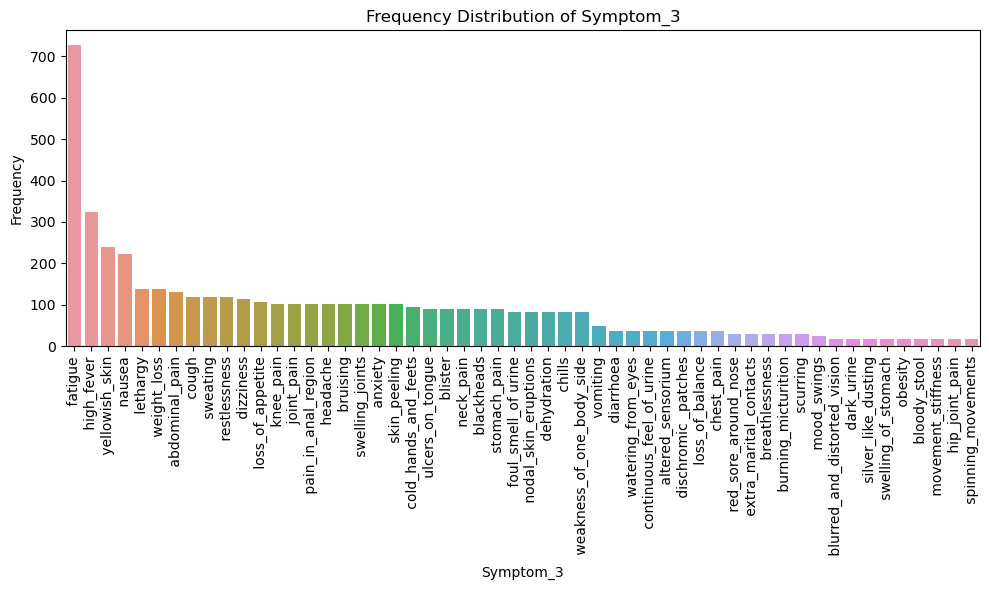

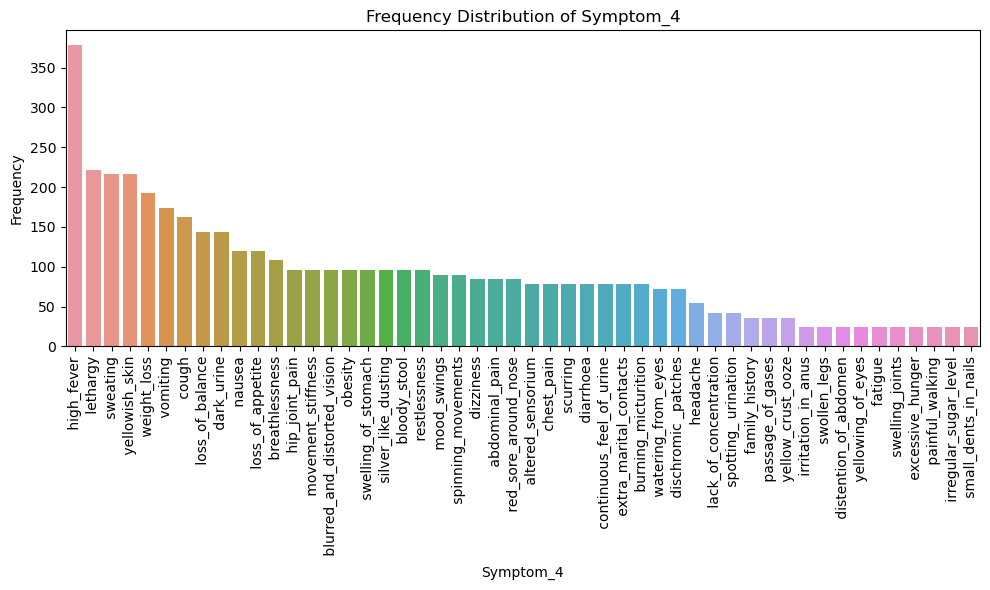

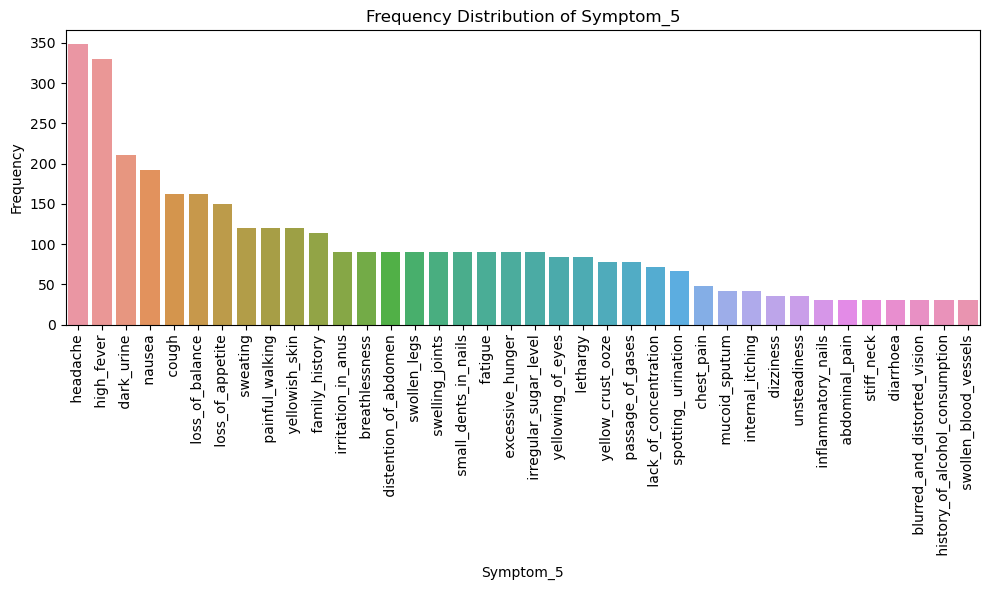

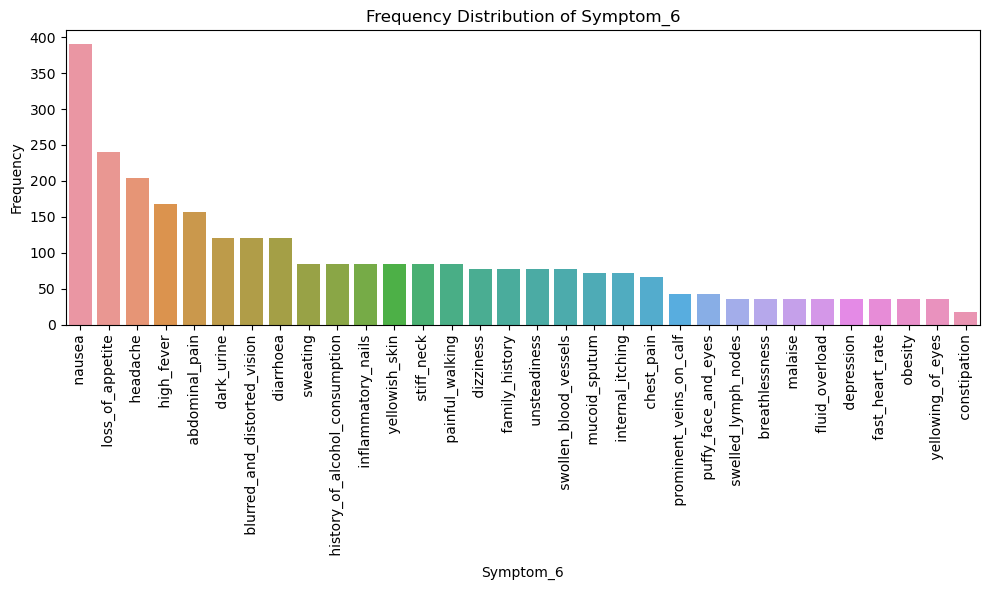

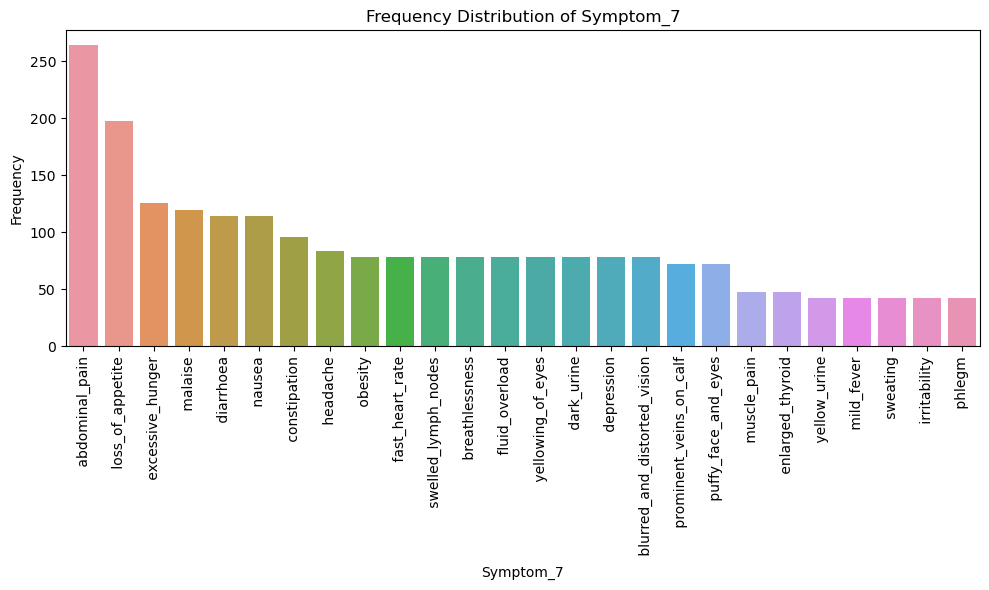

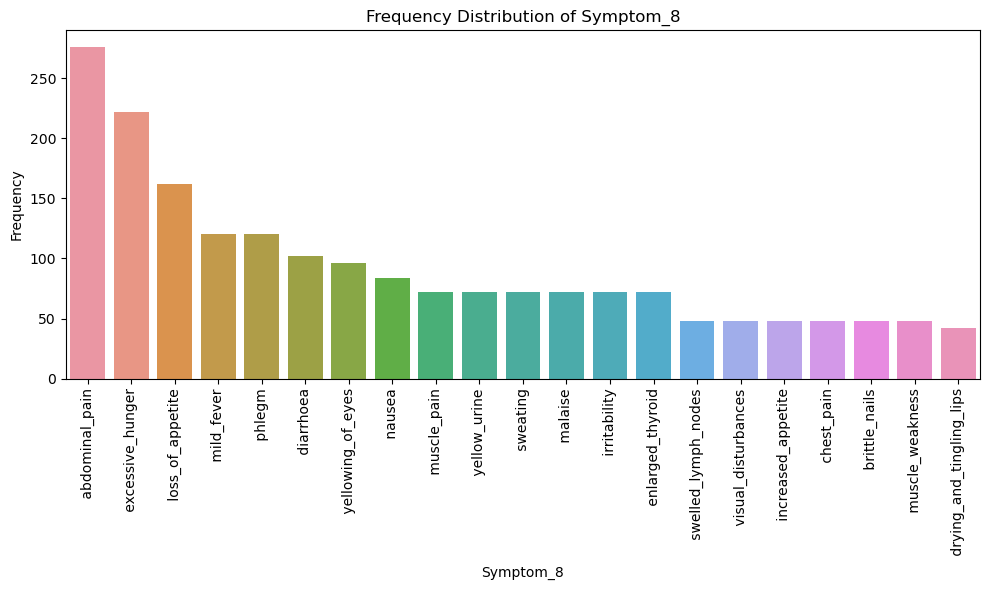

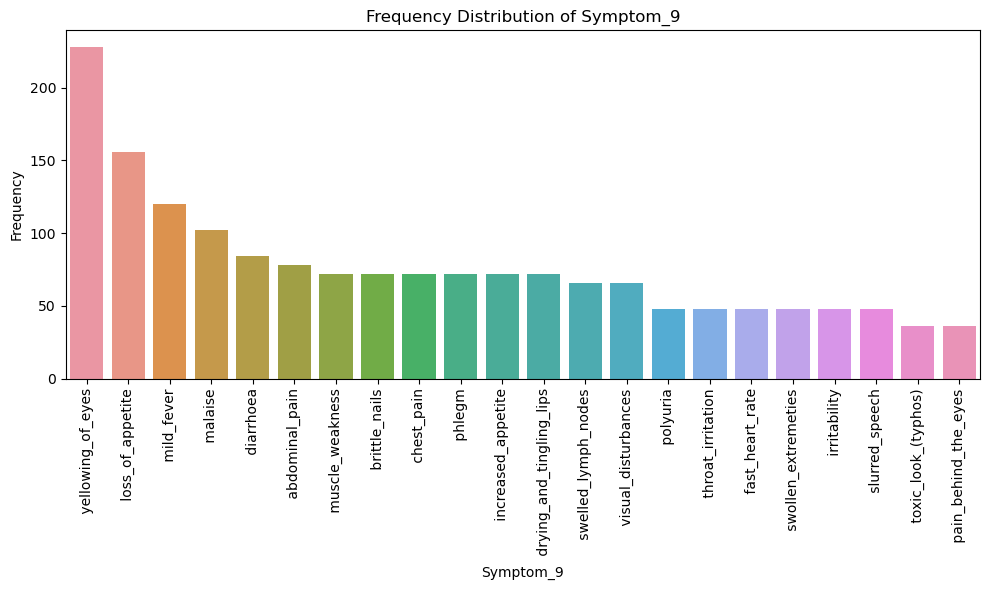

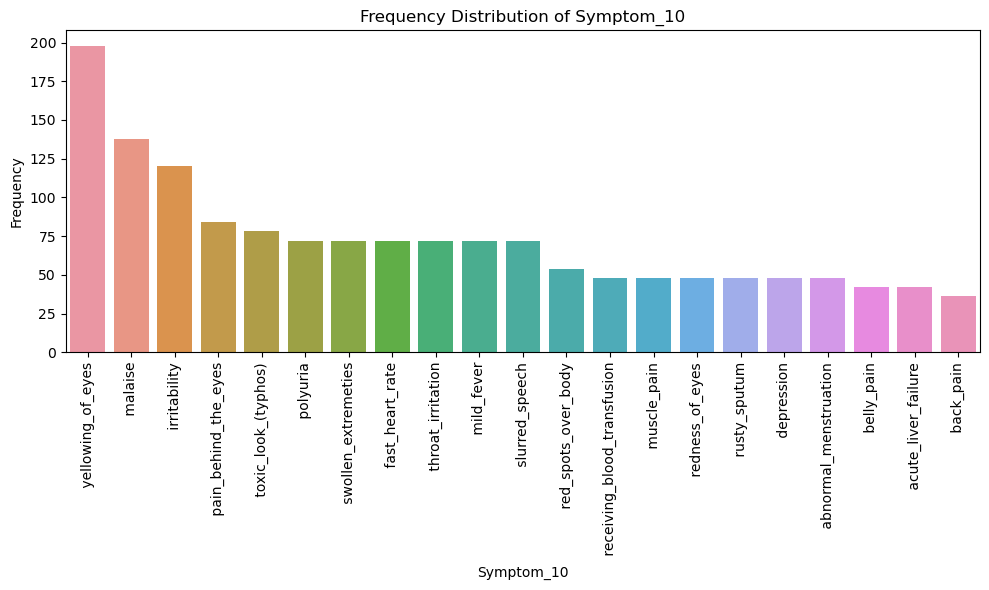

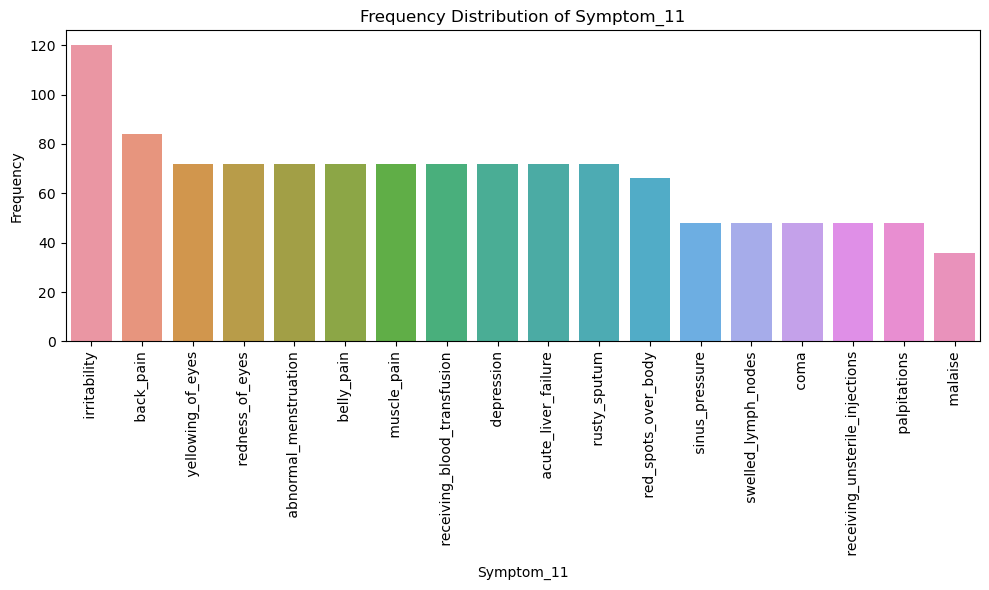

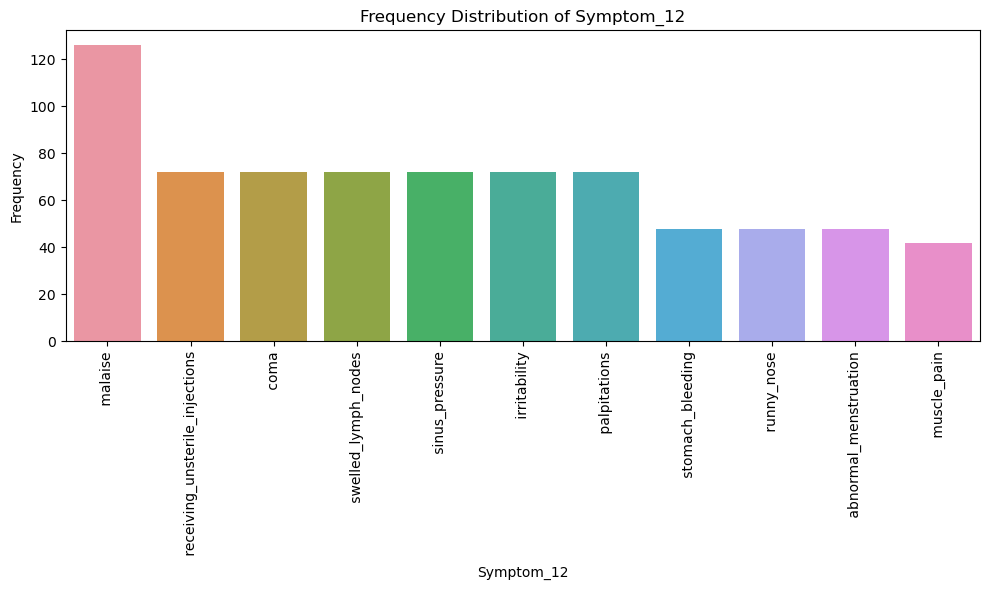

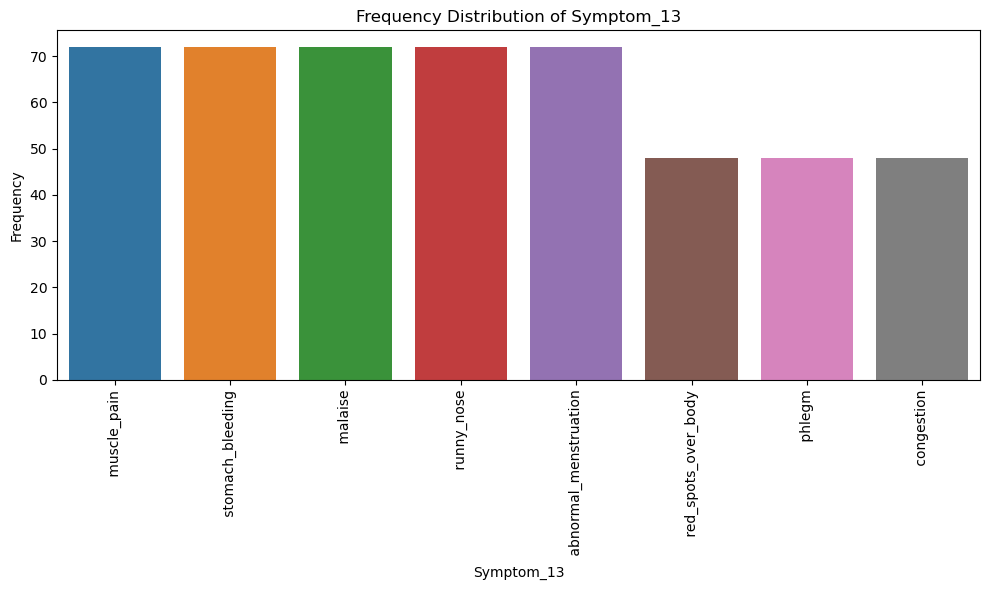

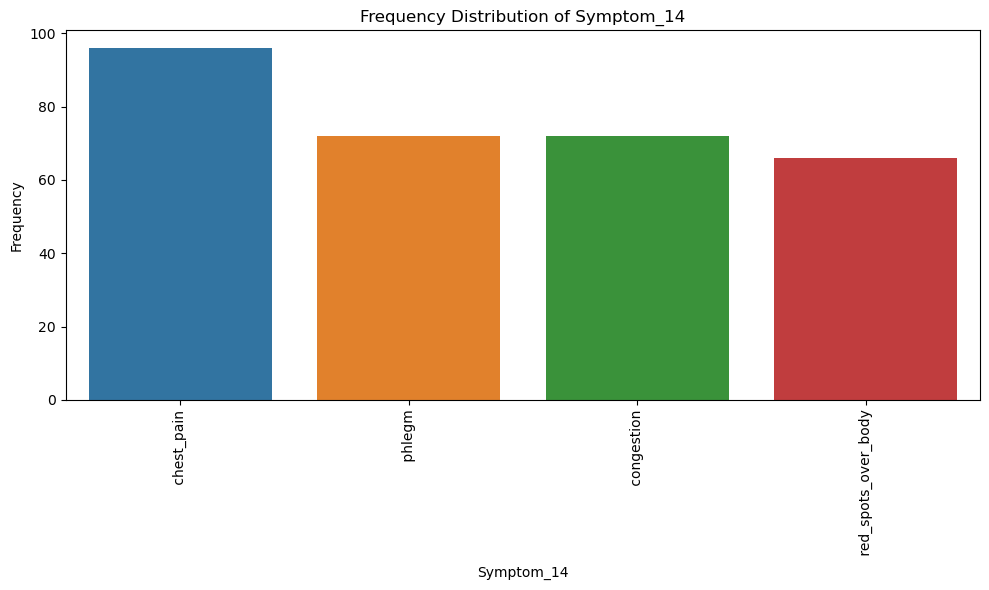

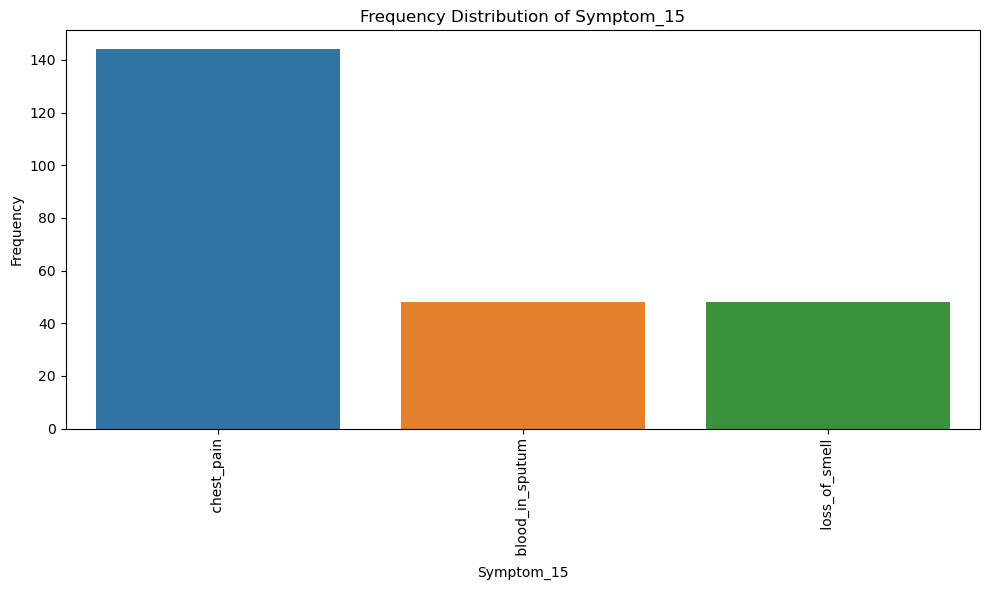

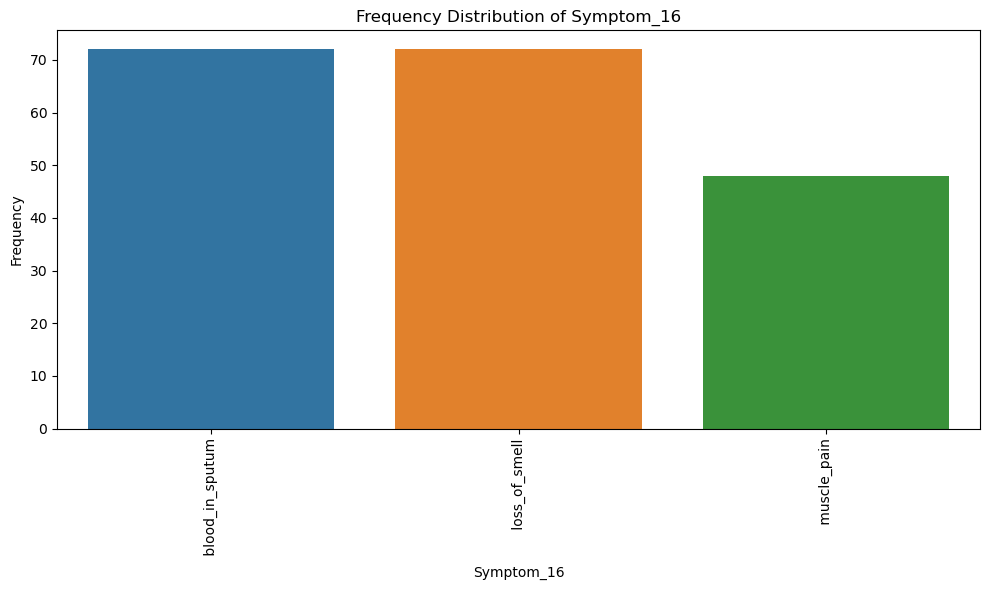

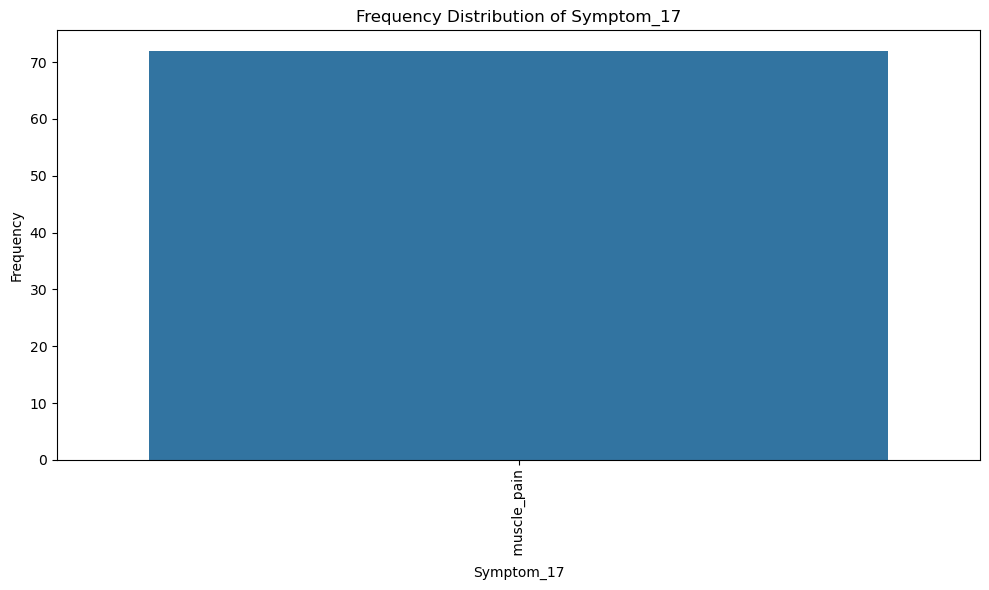

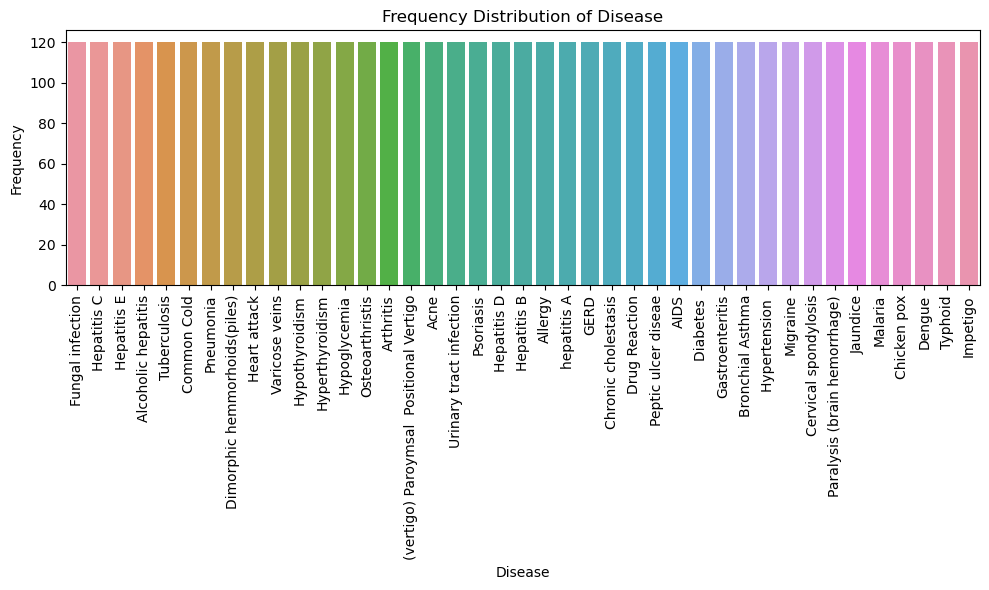

In [16]:
for col in df:
    plt.figure(figsize=(10,6))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col,  order=order)
    plt.title(f"Frequency Distribution of {col}")
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### Univariate Analysis Insights

1. Symptoms Columns ( like Symptom_1, Symptom_2, etc.) show a Right-skewed frequency, indicating a few sympotms dominate in occurance.<br>
2. The 'Disease' target variable is **highly imbalanced**, with some disease having significantly occurs more time than others.<br>
3. A large number of symptoms columns contains Repeated Sympotms( like Itching, fatigue, vomiting, headache) and remaining symptoms columns have unknown 'NaN' values. 

## Bivariate Analysis

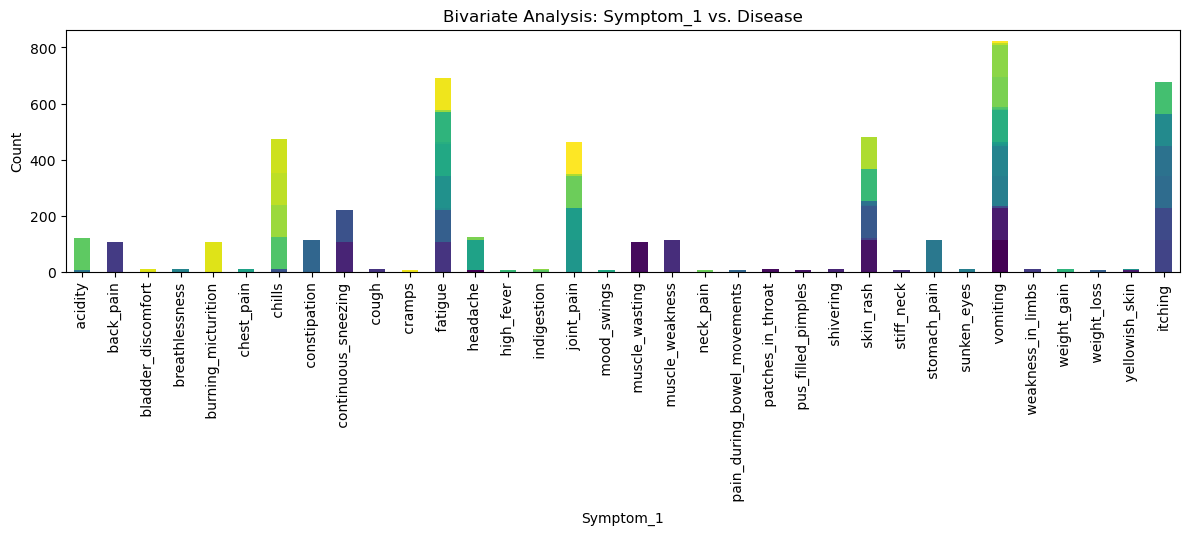

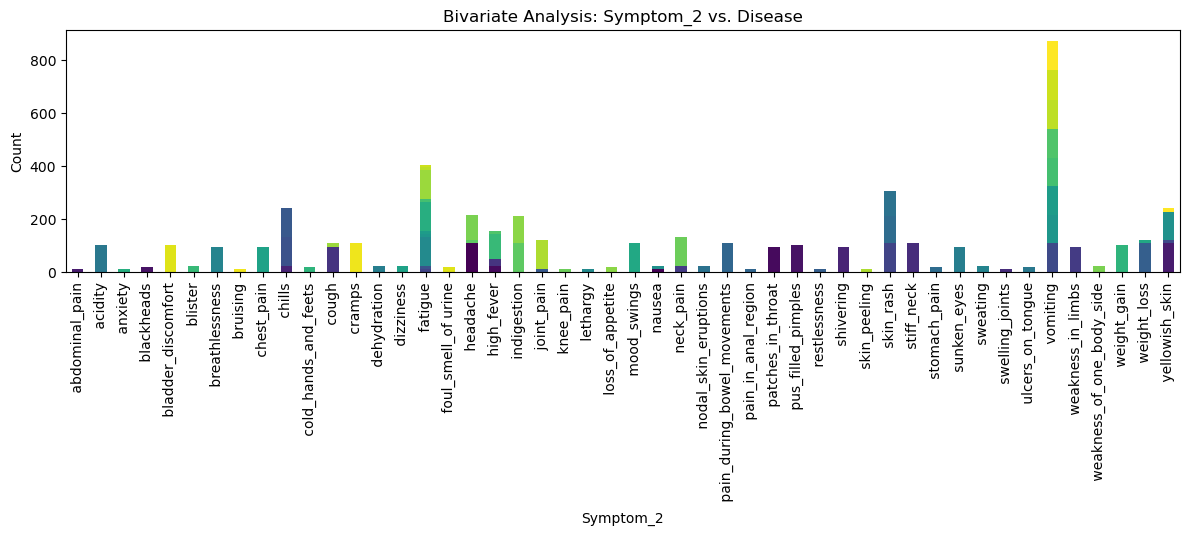

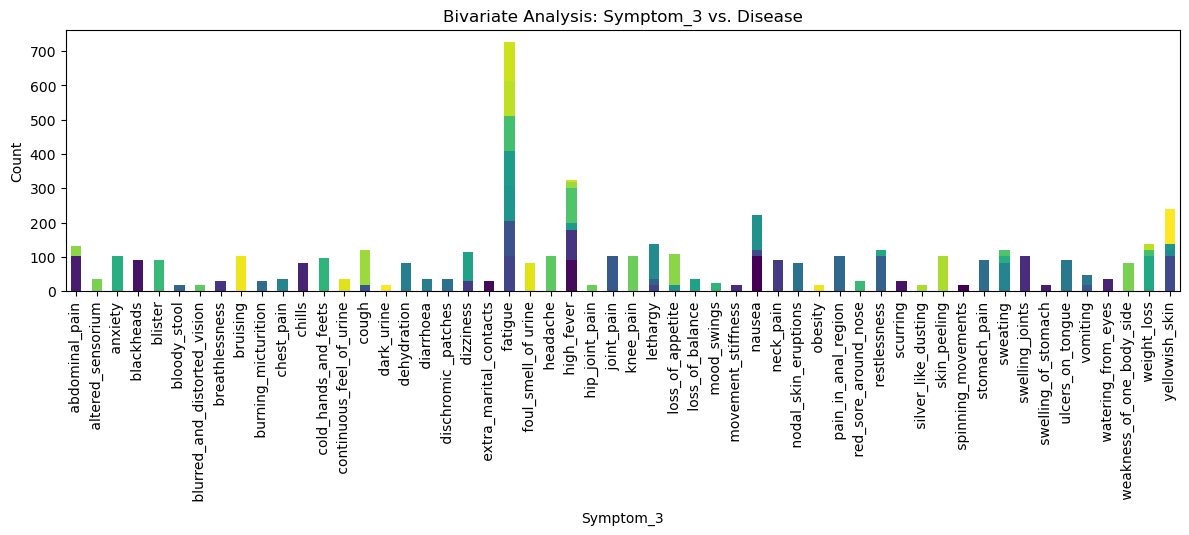

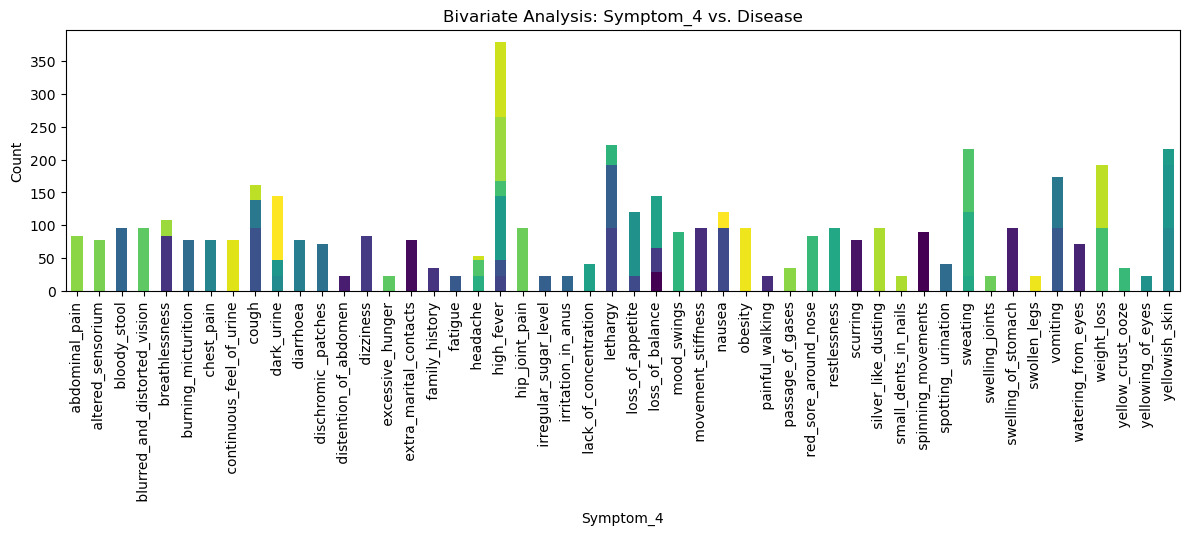

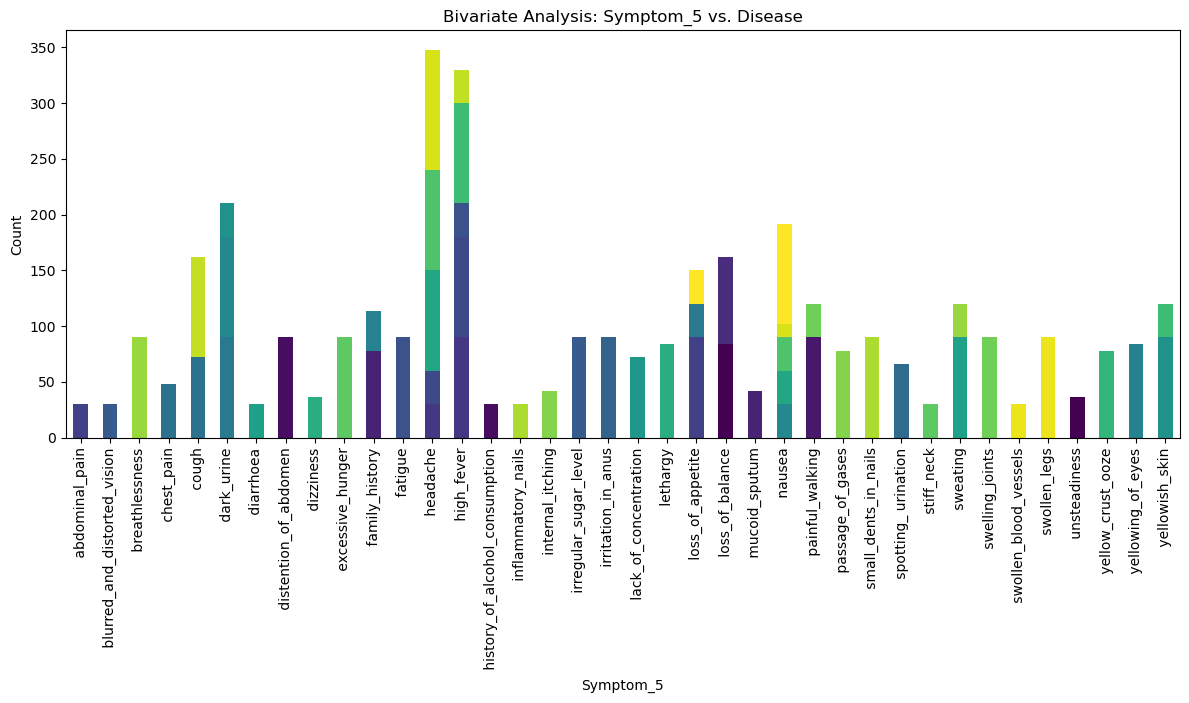

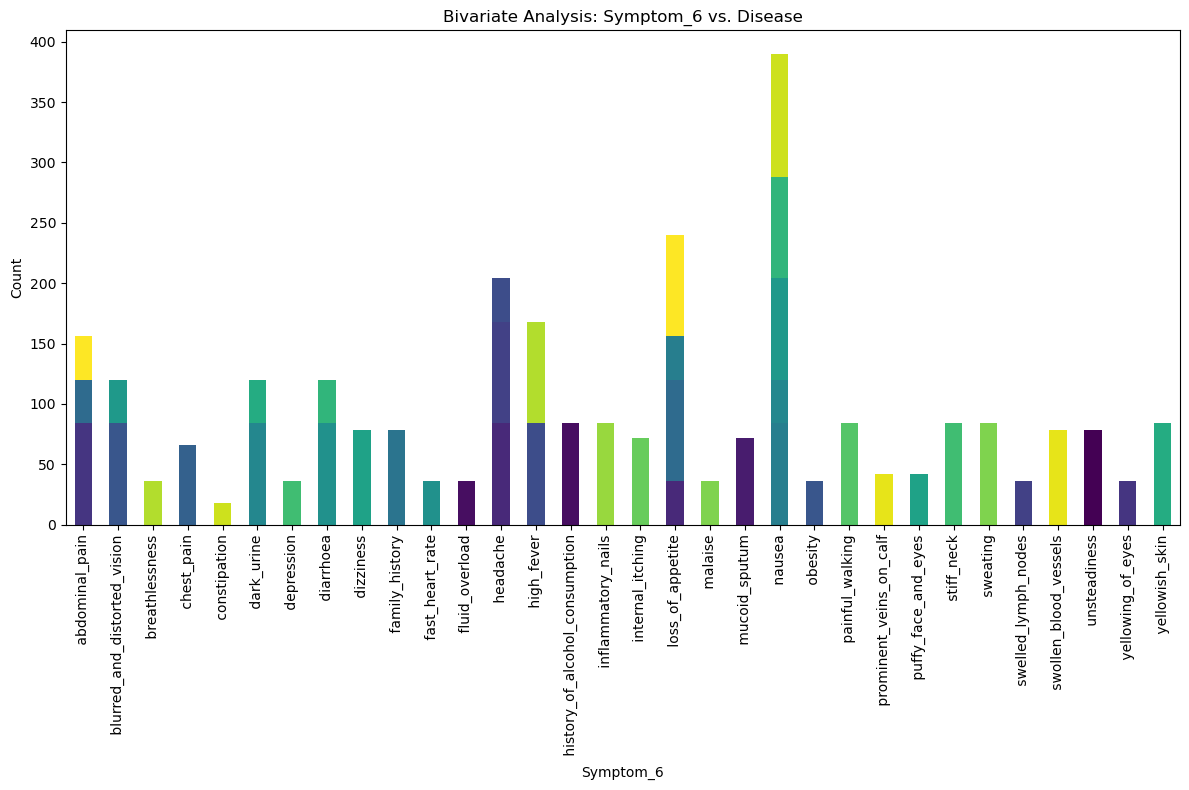

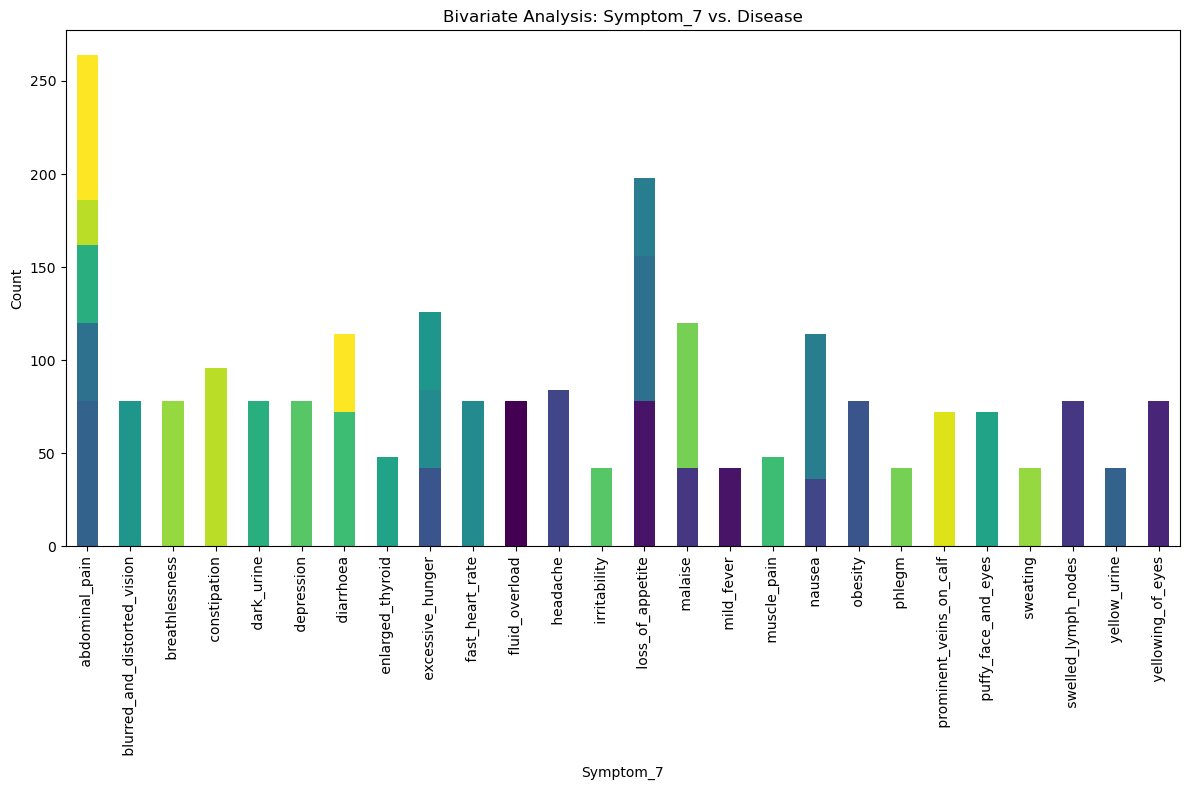

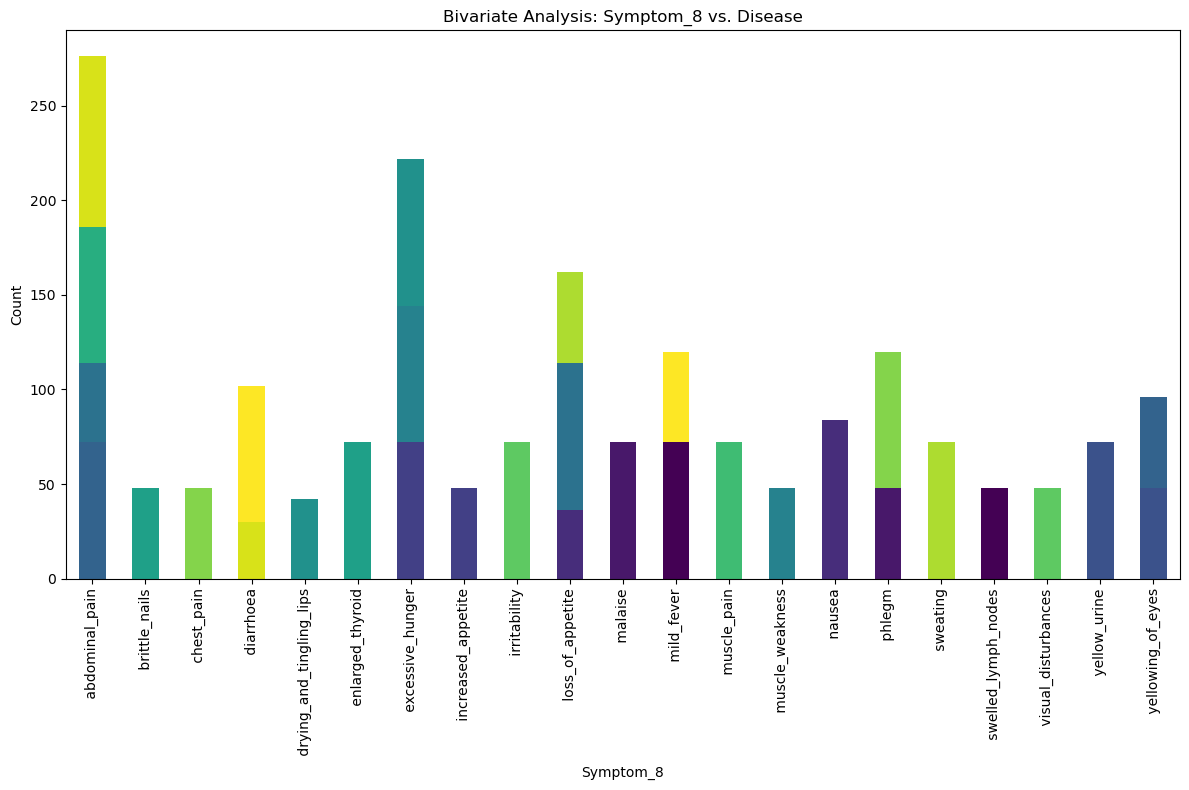

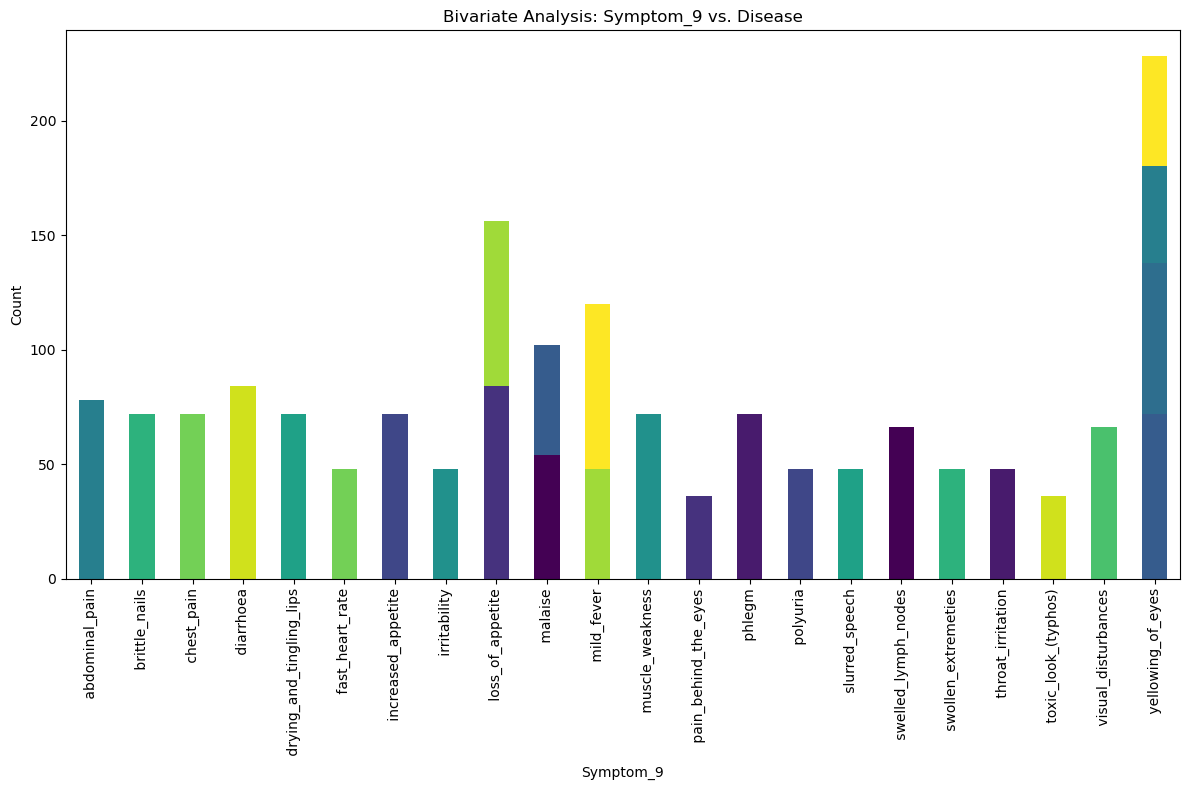

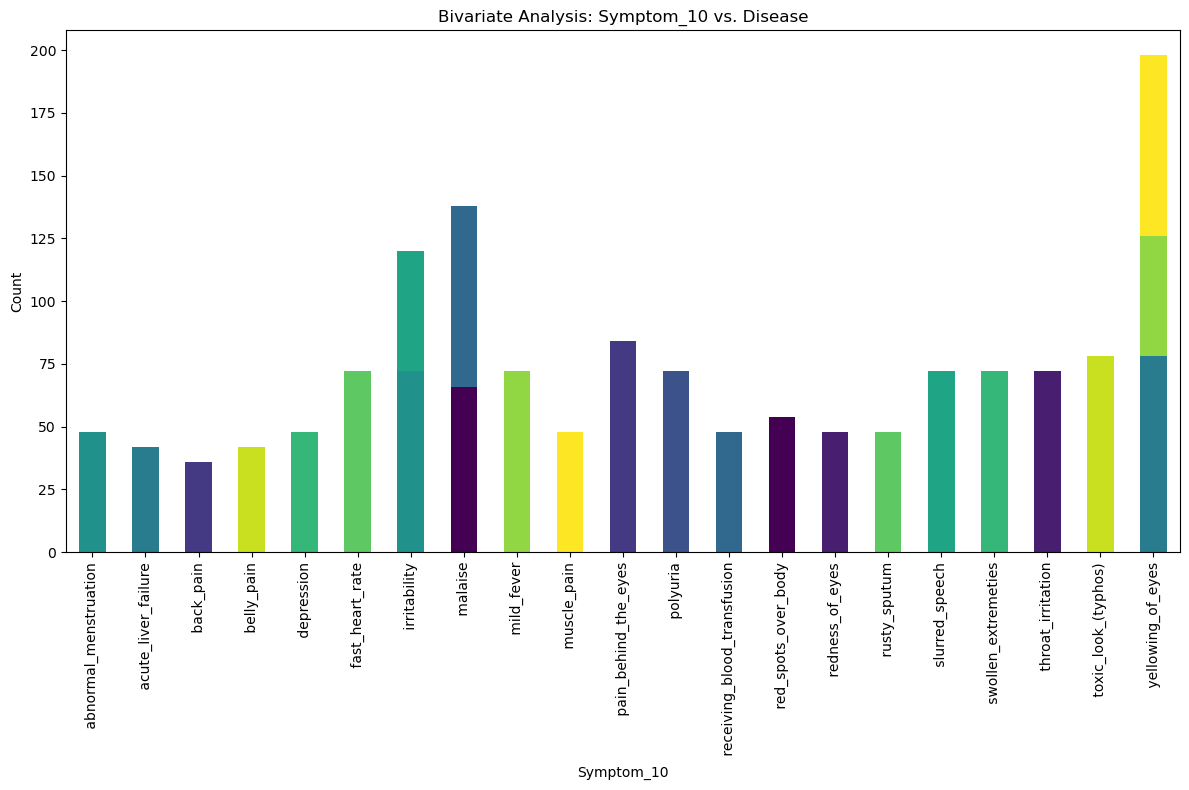

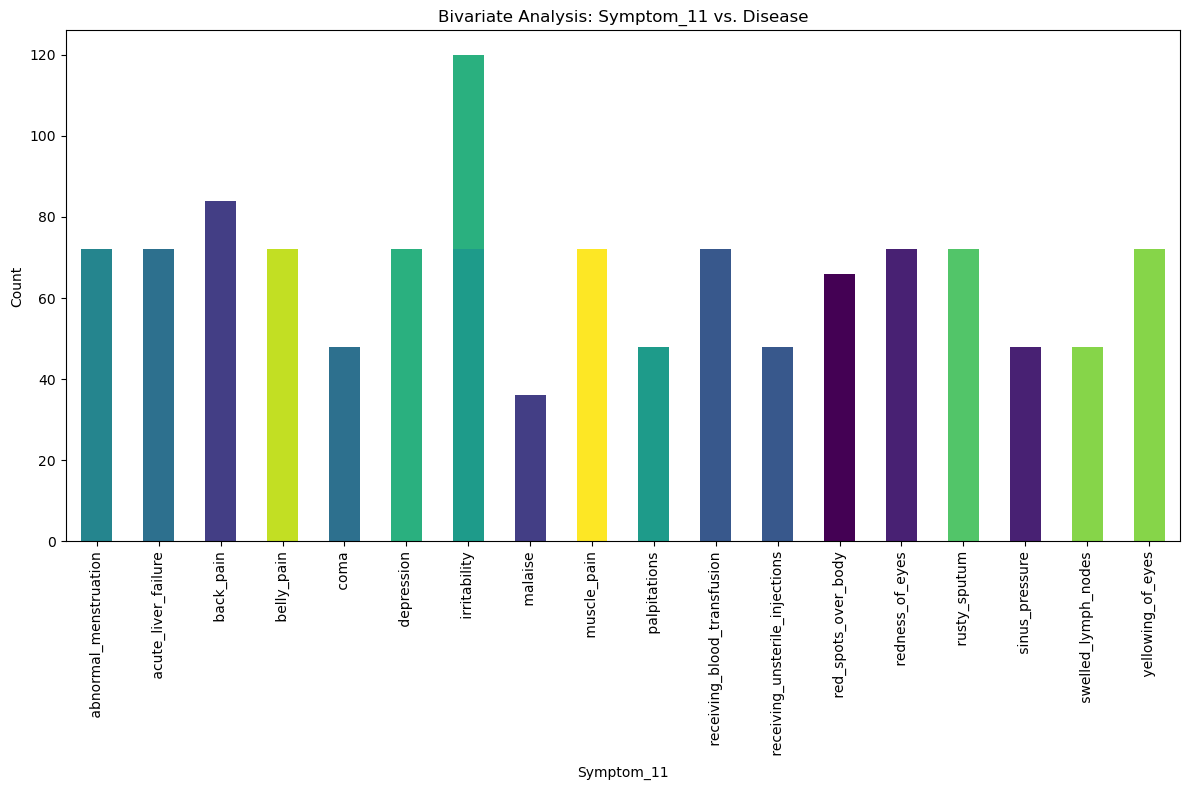

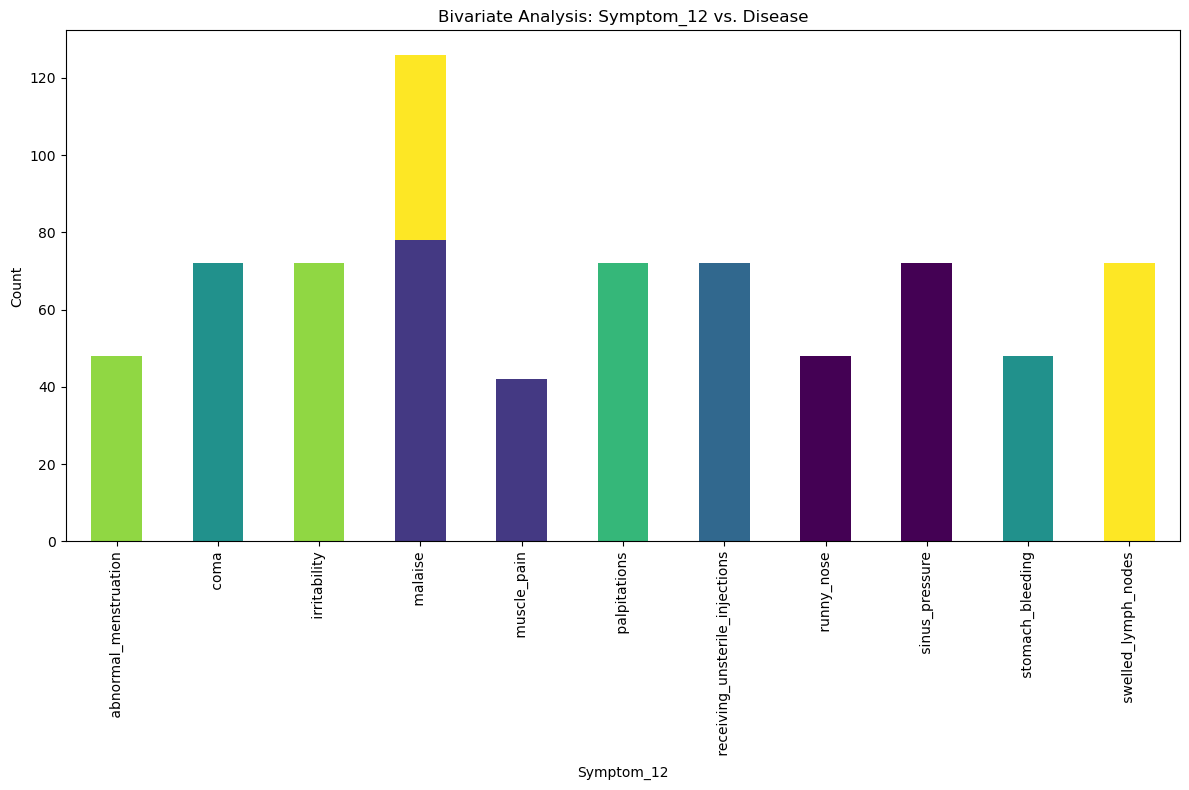

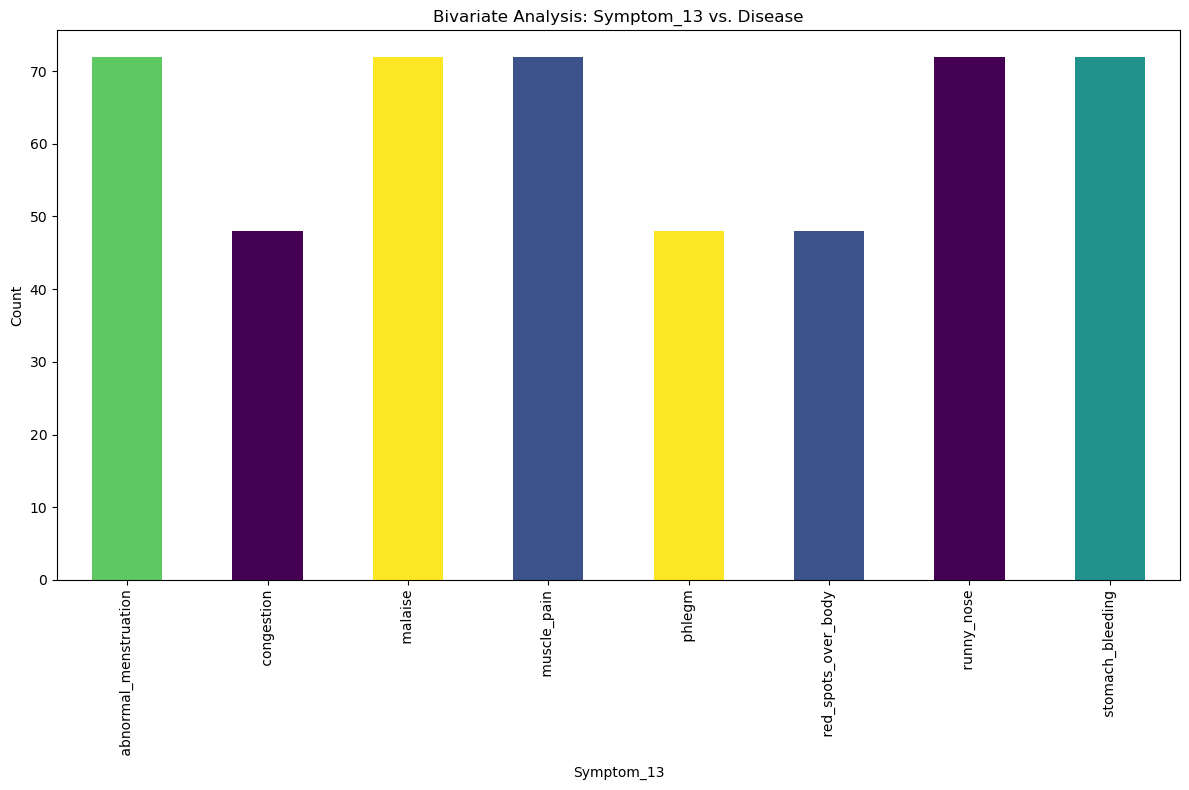

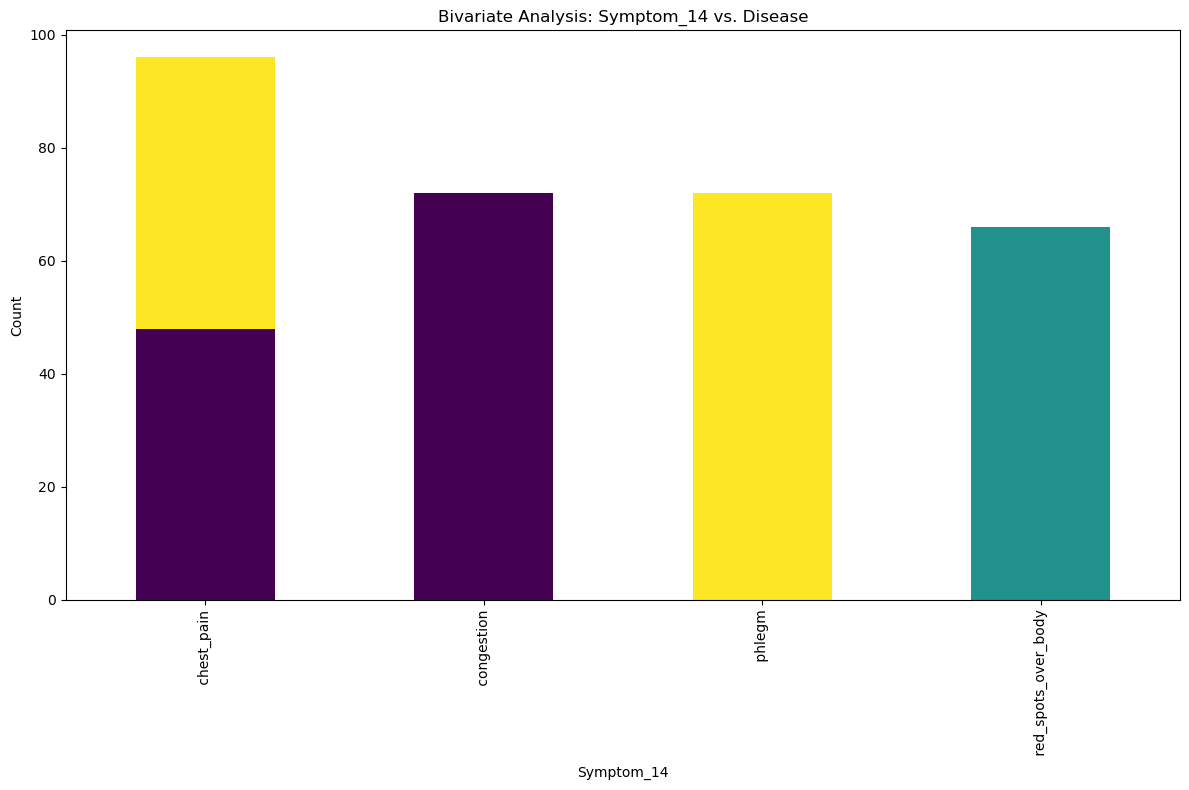

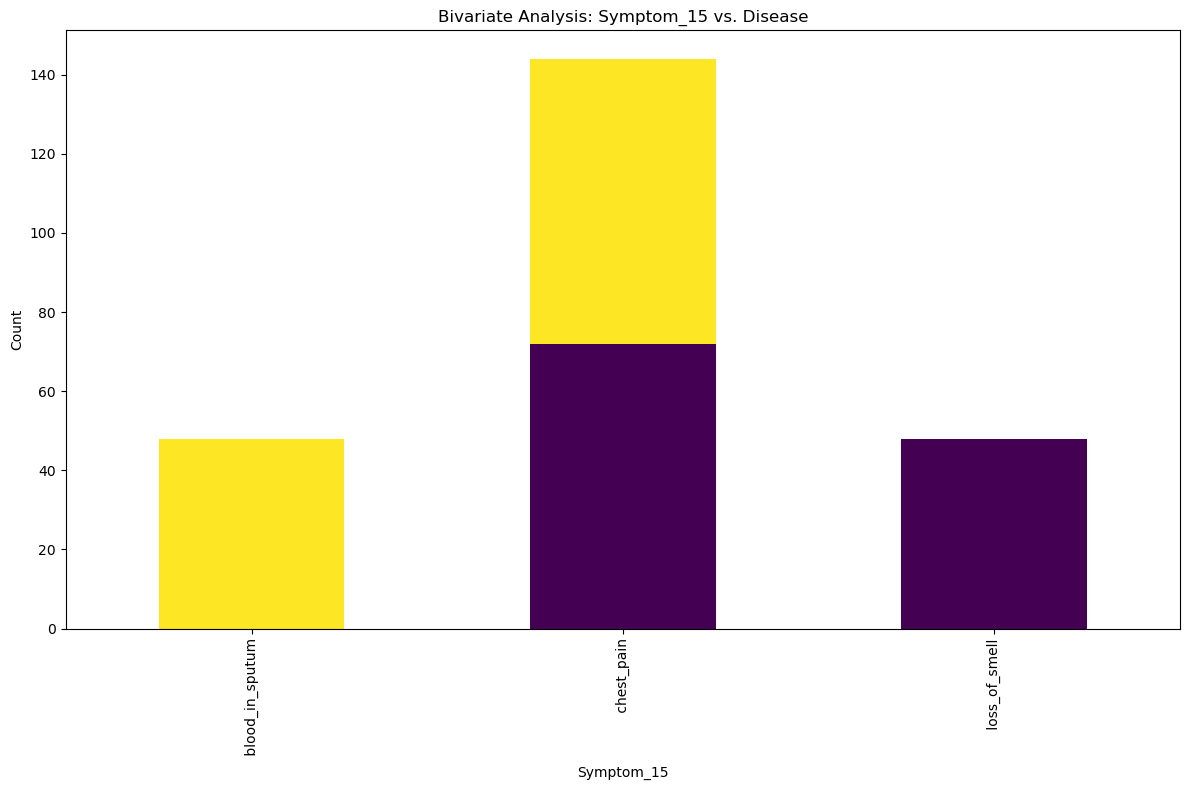

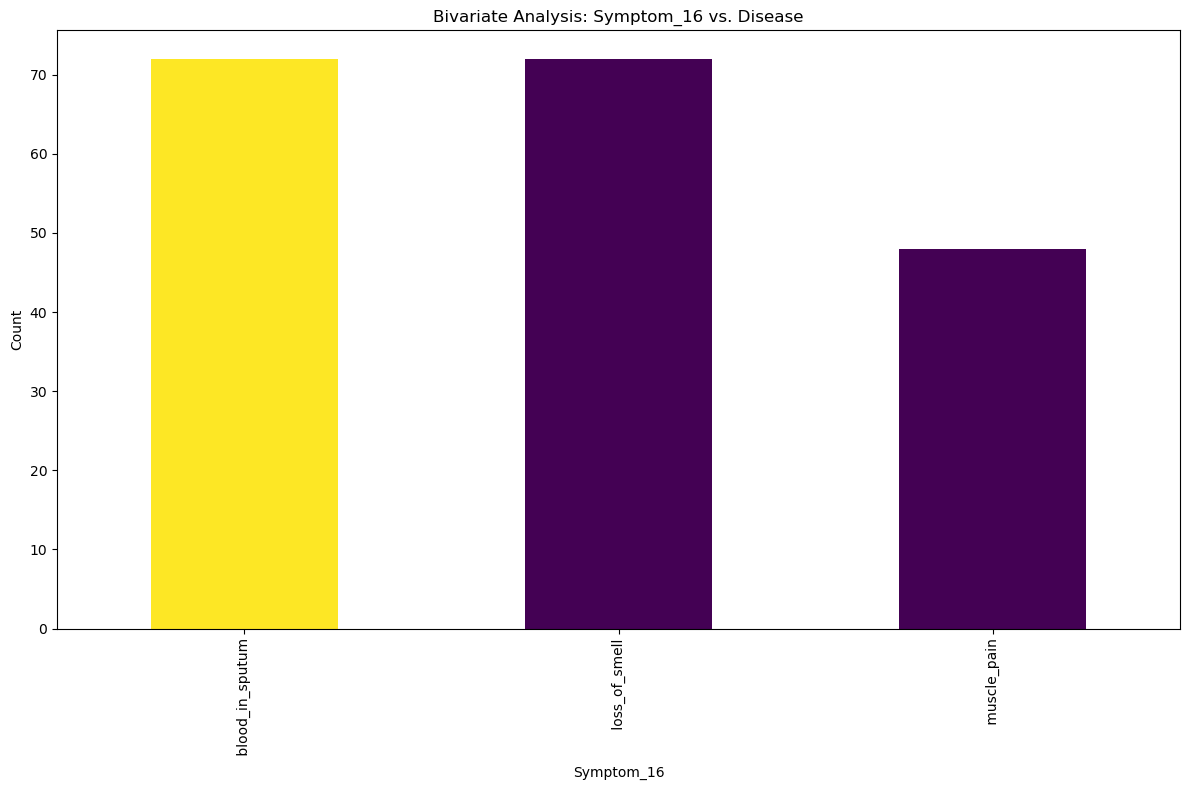

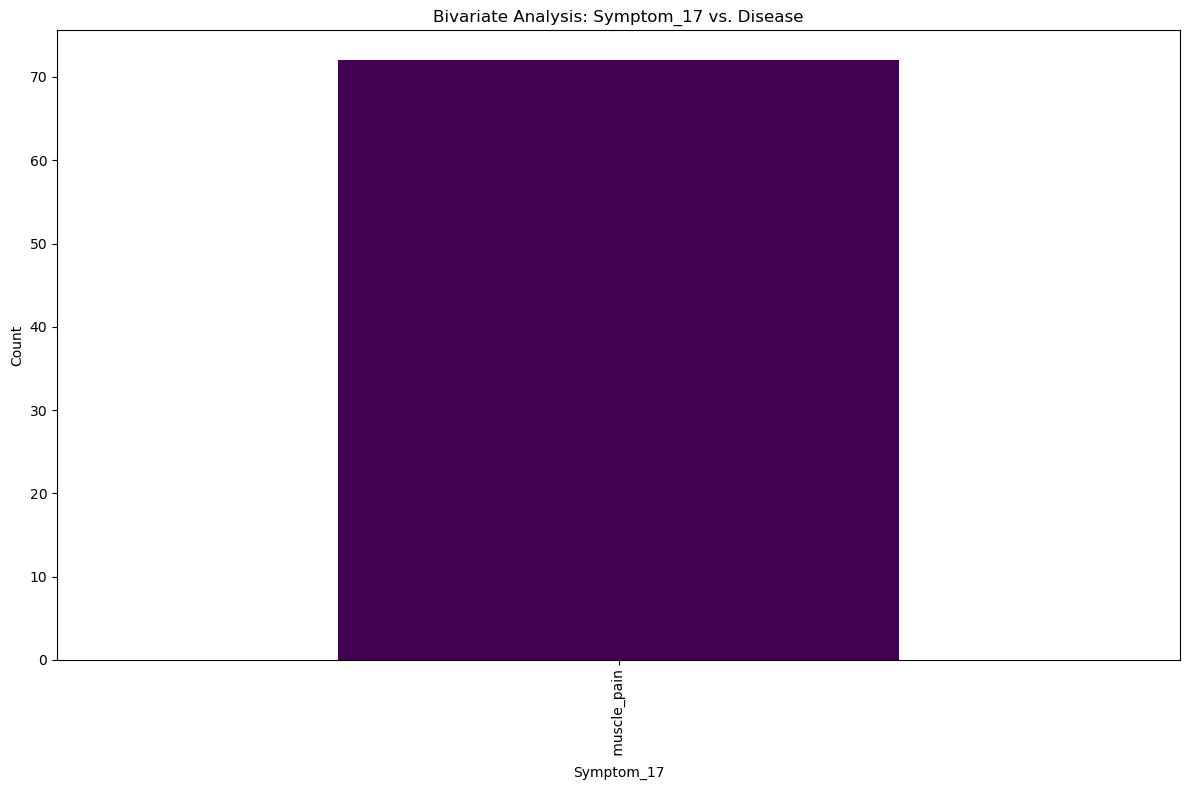

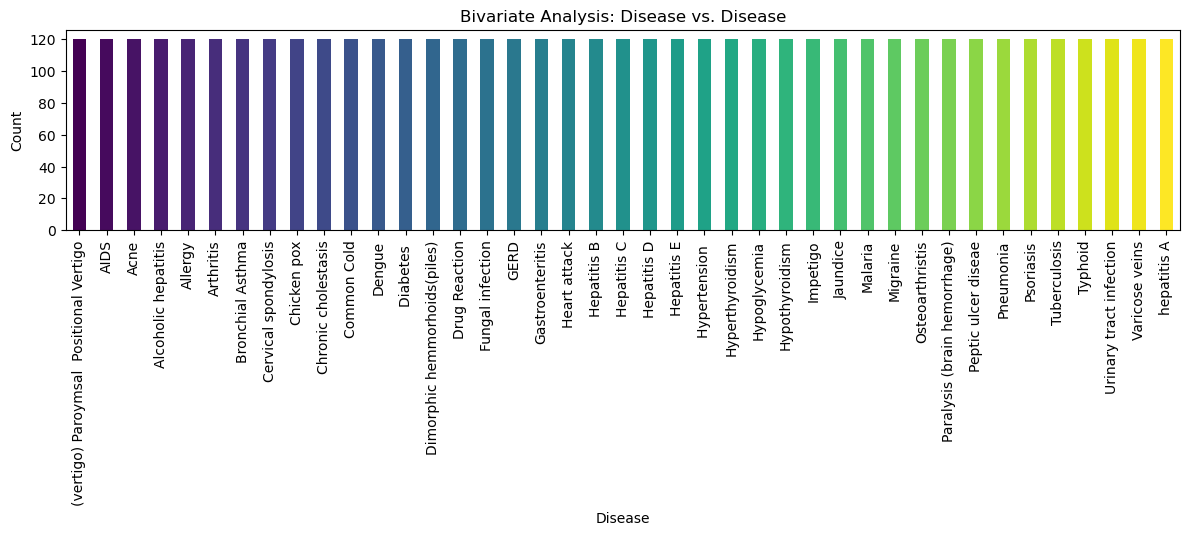

In [17]:
for col in df:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ct = pd.crosstab(df[col], df["Disease"])
    ct.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")
    
    ax.set_title(f"Bivariate Analysis: {col} vs. Disease")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)
    
    plt.tight_layout()
    plt.legend().set_visible(False)
    plt.show()

### Bivariant Analysis Insights:

1. A few symptoms like itching, chills, and sweating mostly appear in only 1–2 diseases, showing a strong link with disease.
2. Some symptoms such as **fatigue** and **vomiting** are seen across **many different diseases**, so they might be less useful for classifying  disease.
3. The bar charts helps to spot which symptoms are **more specific vs. more common** across disease. 

## Multivariant Analysis:

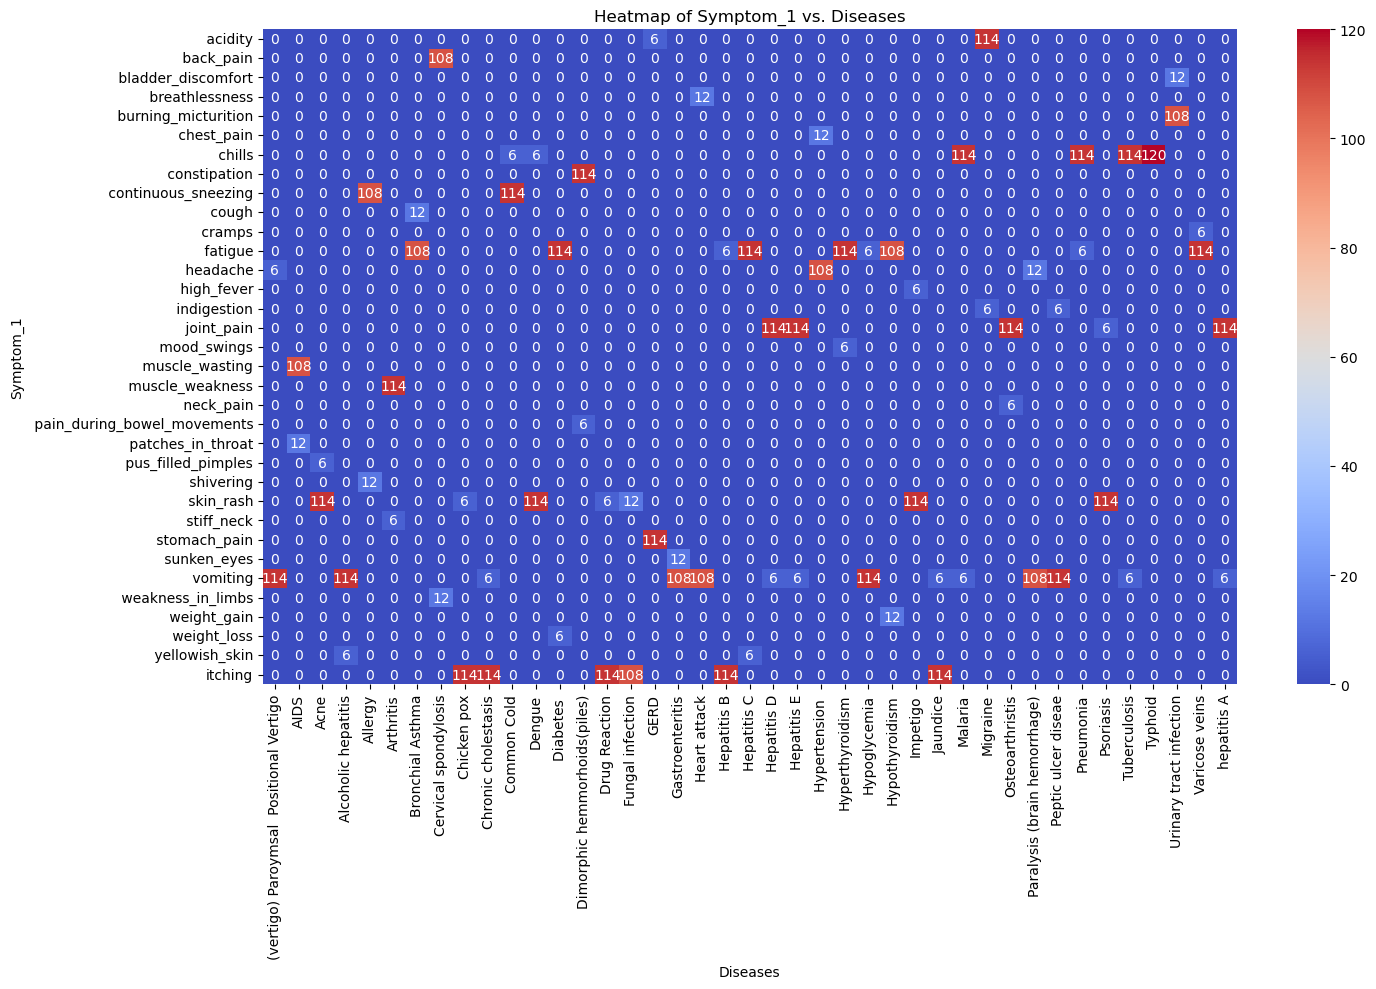

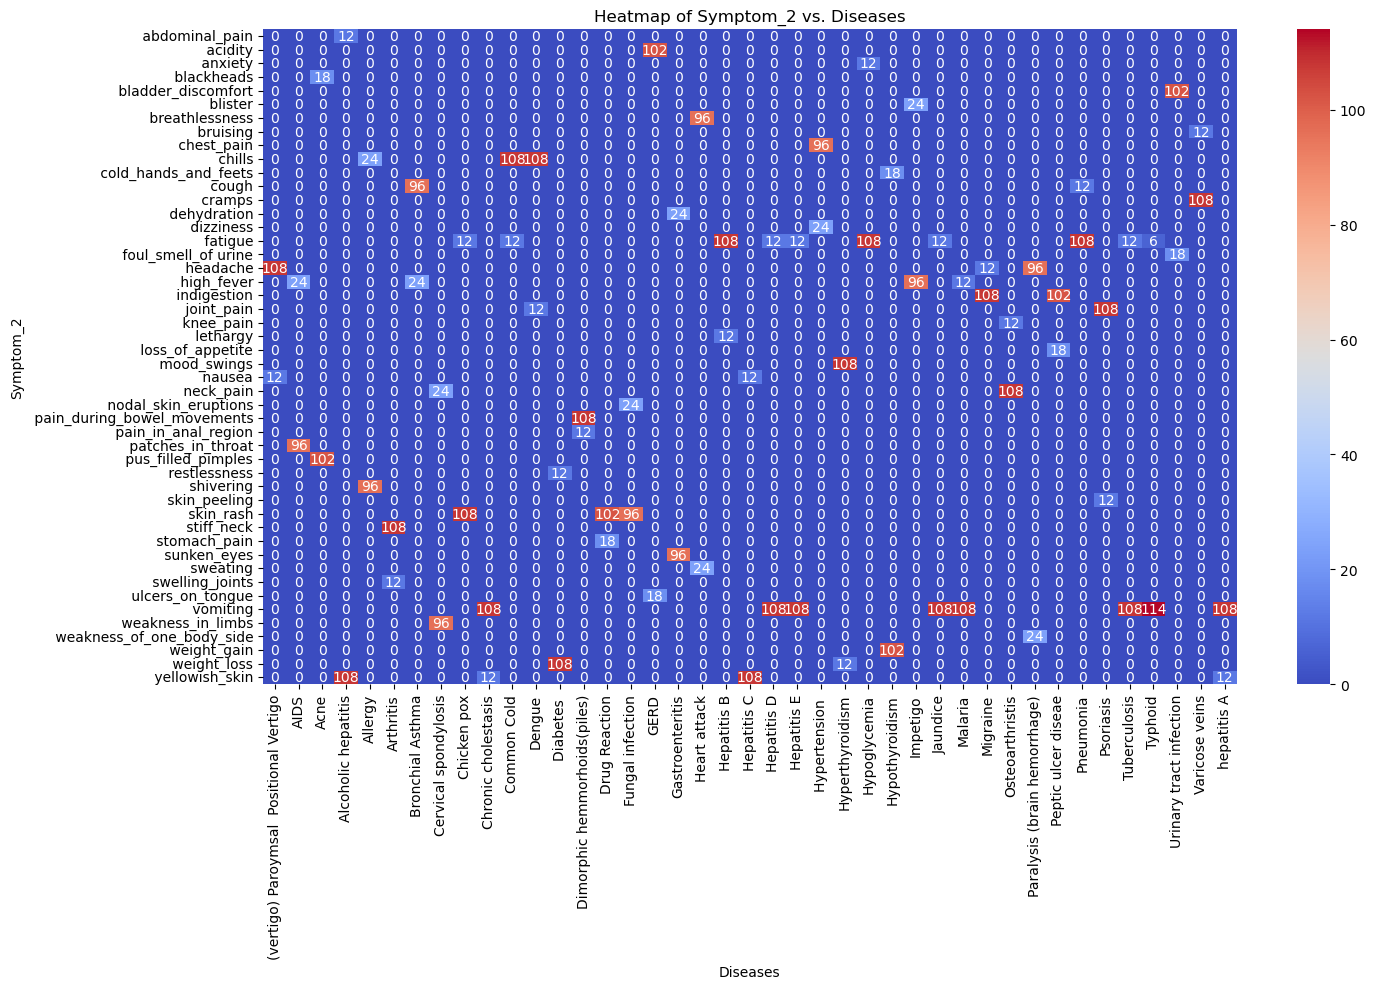

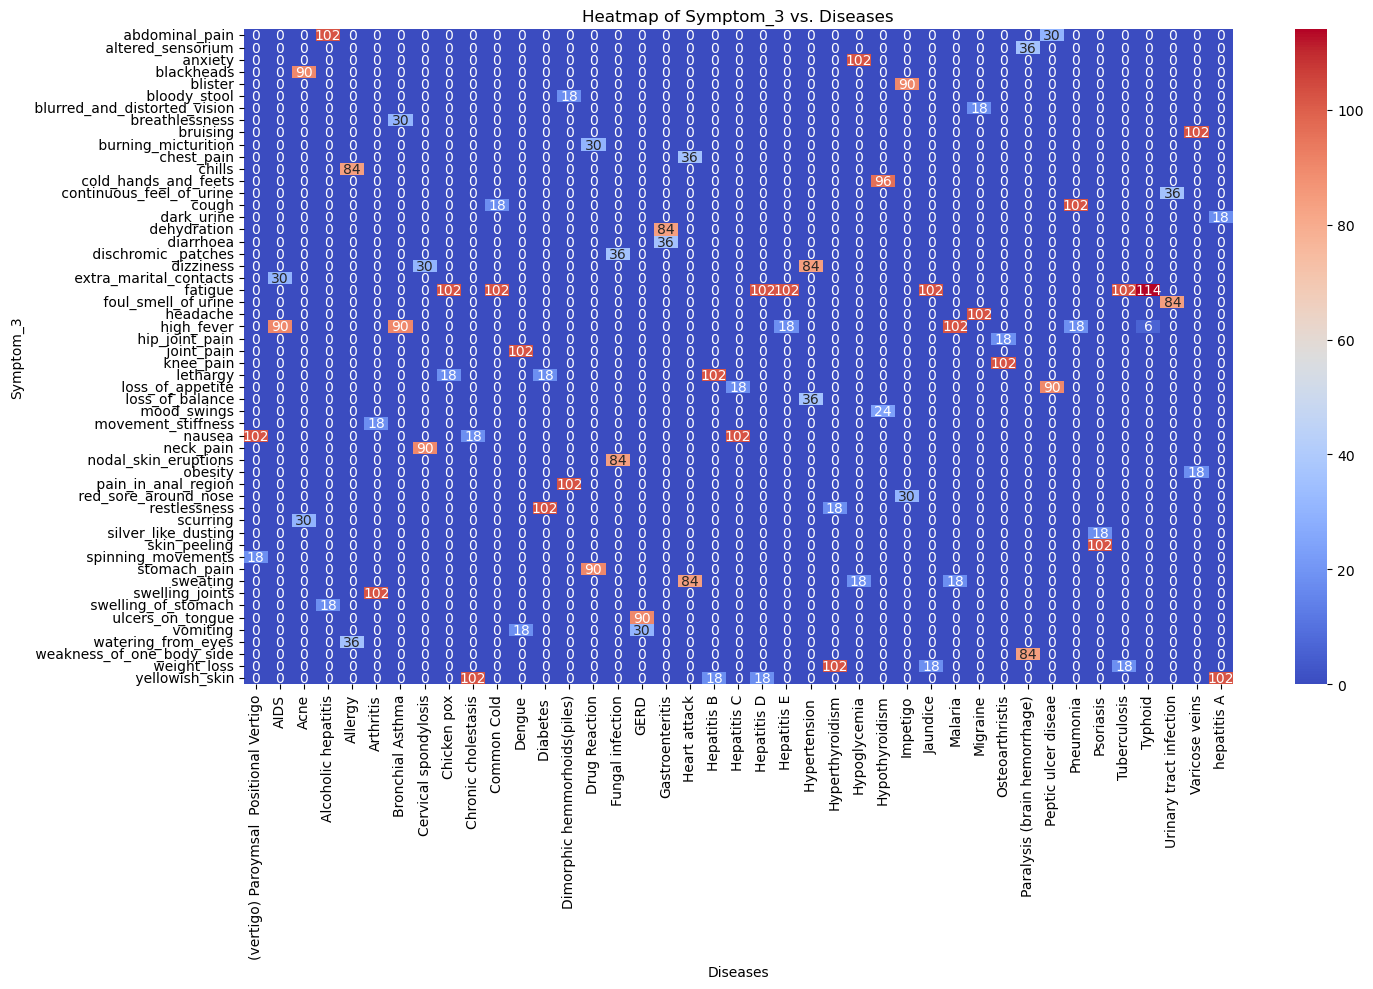

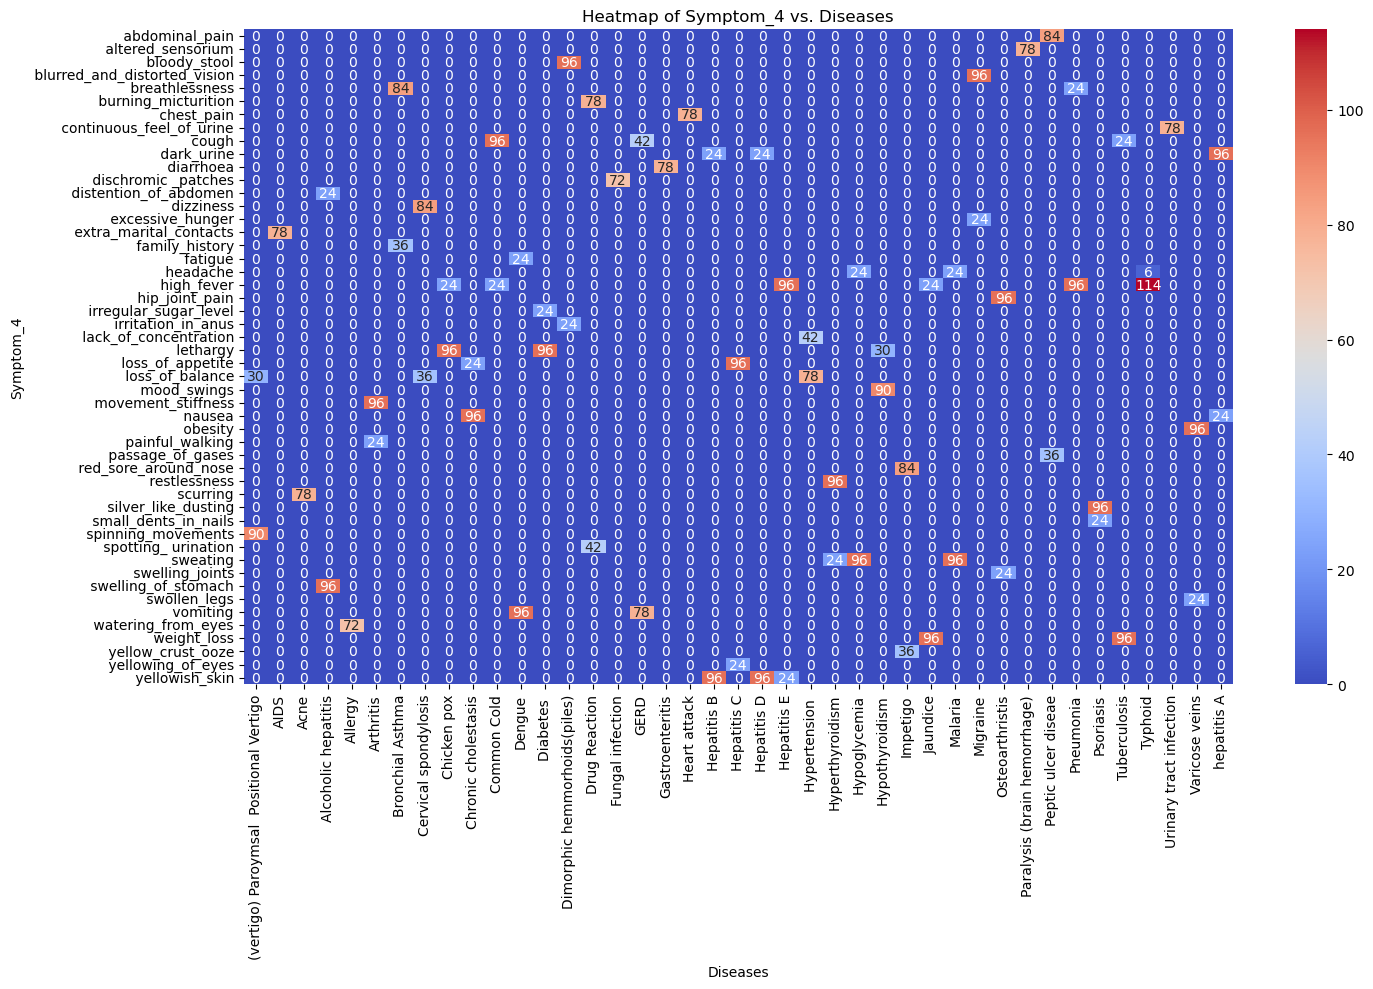

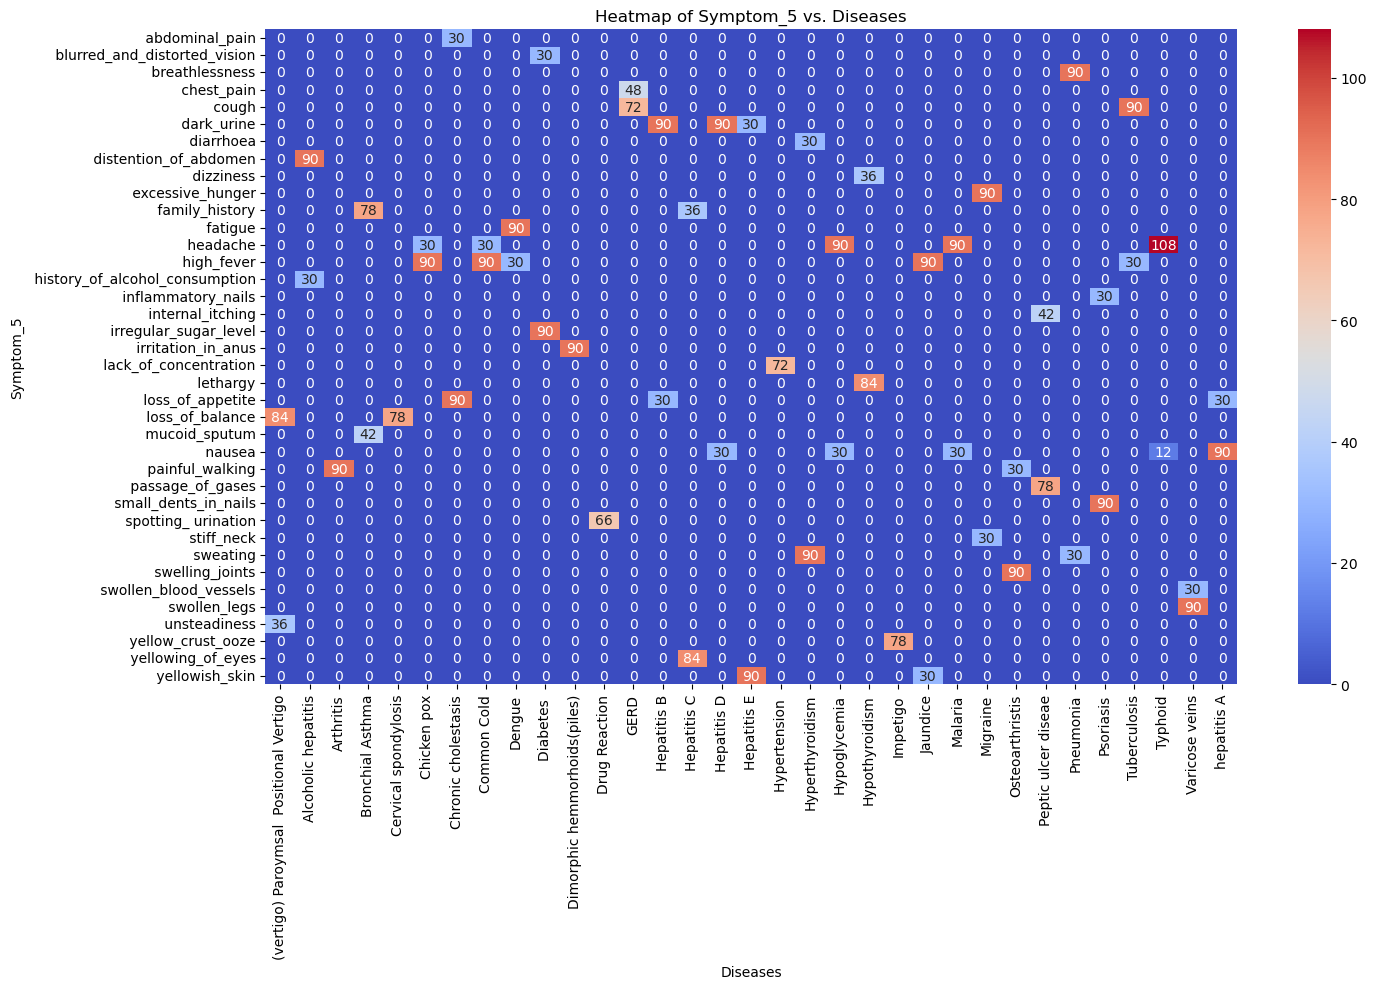

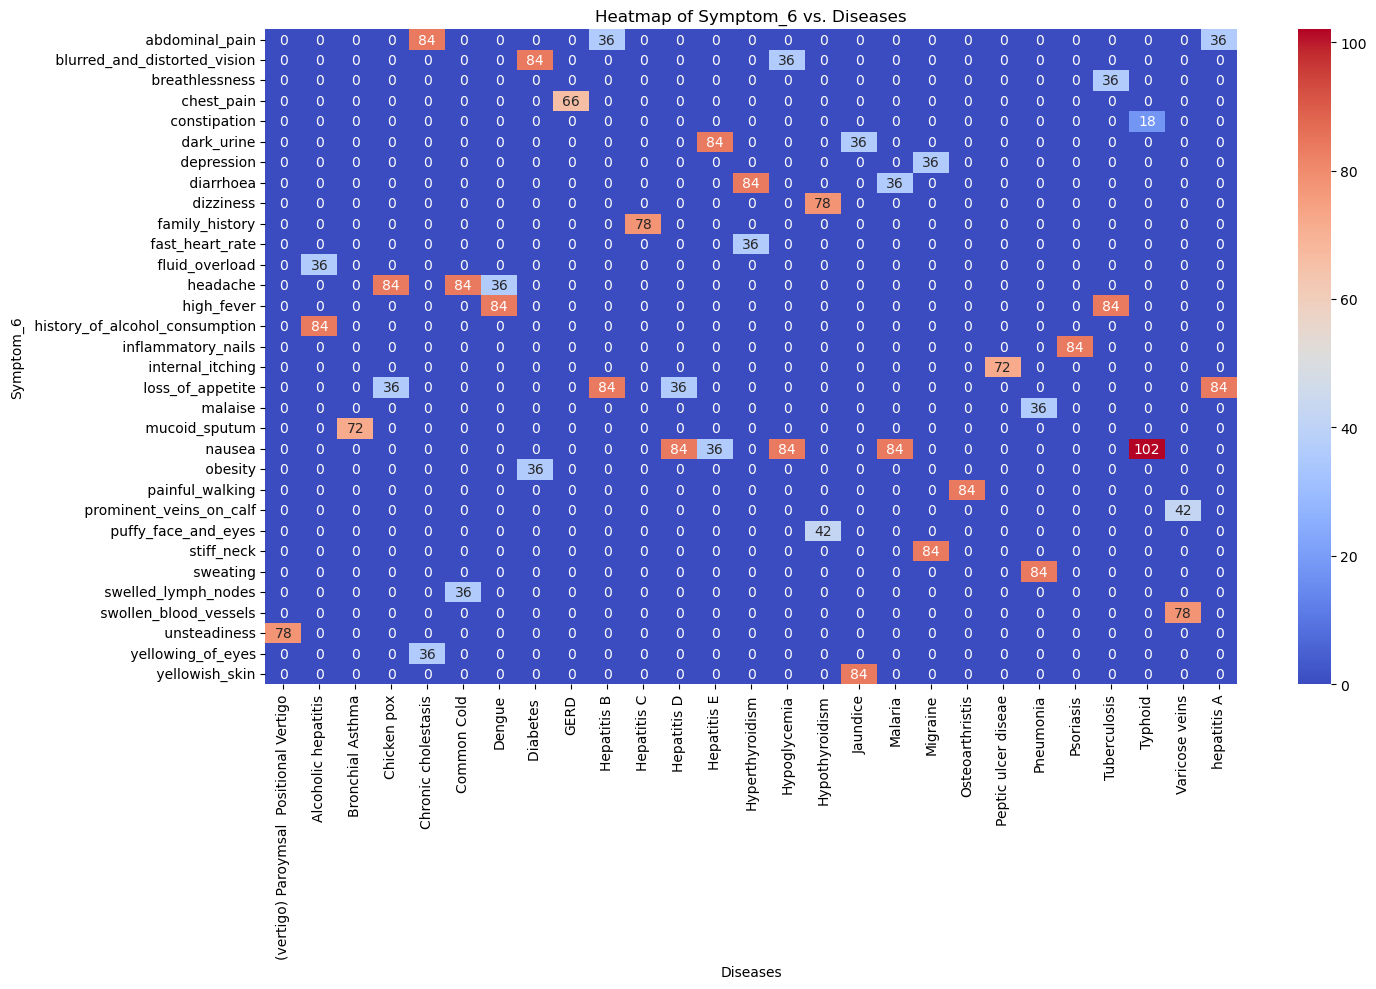

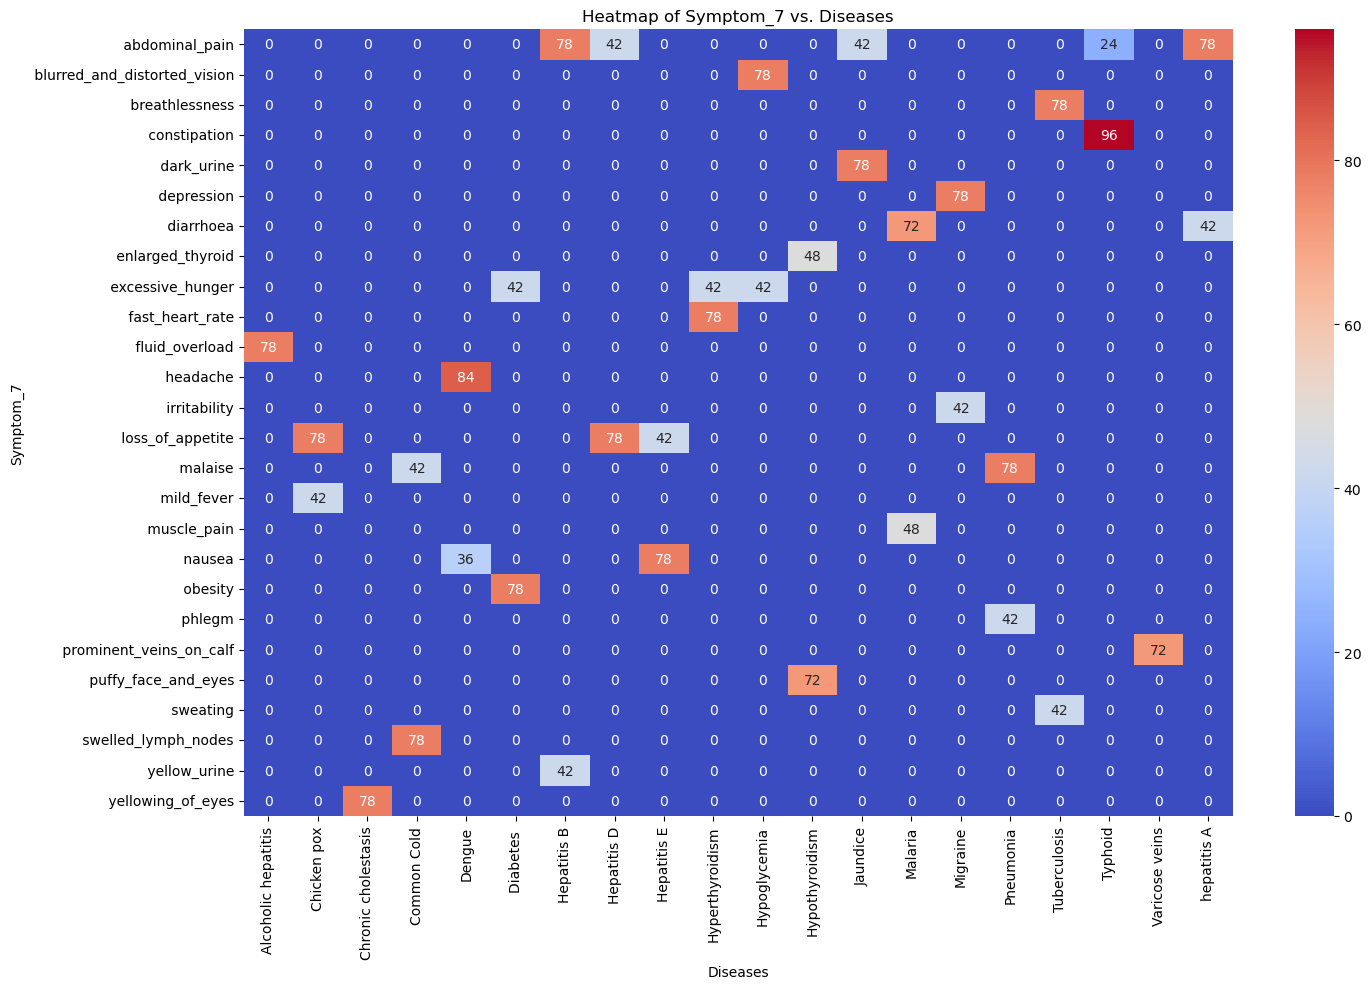

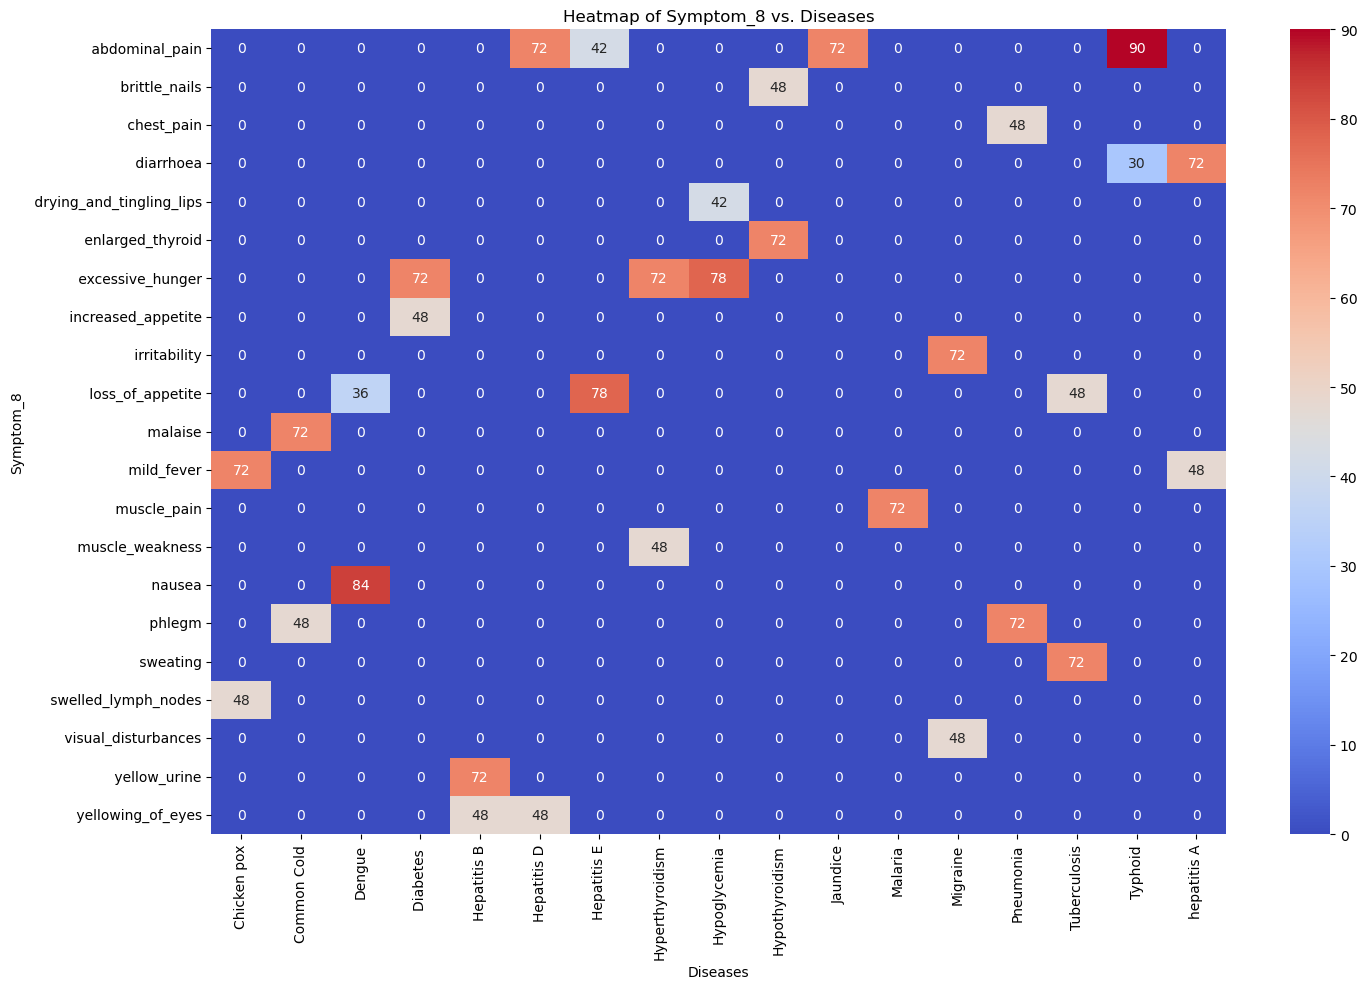

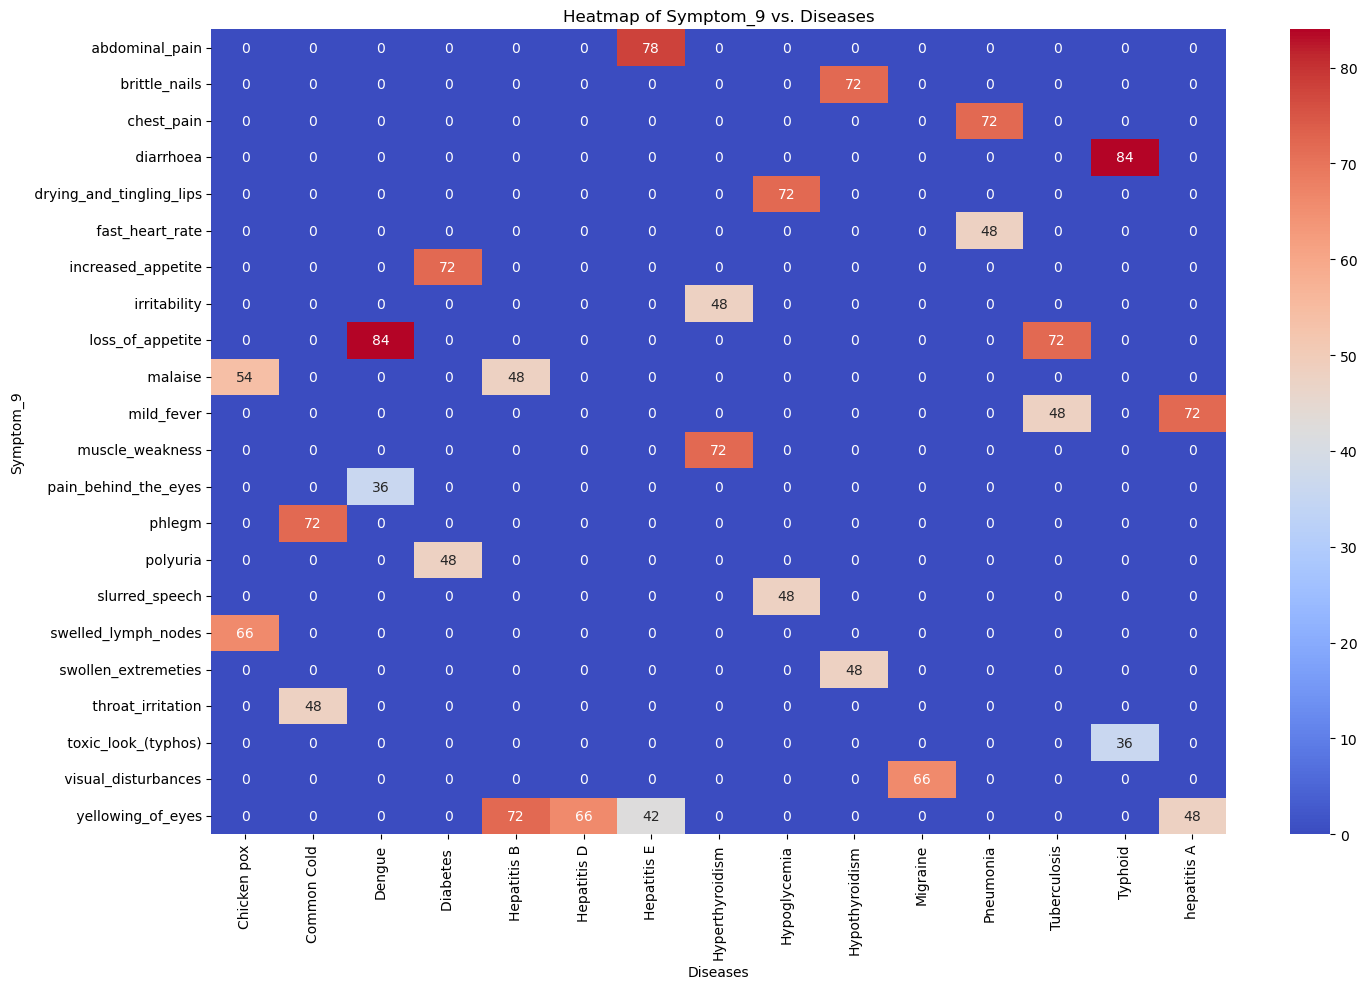

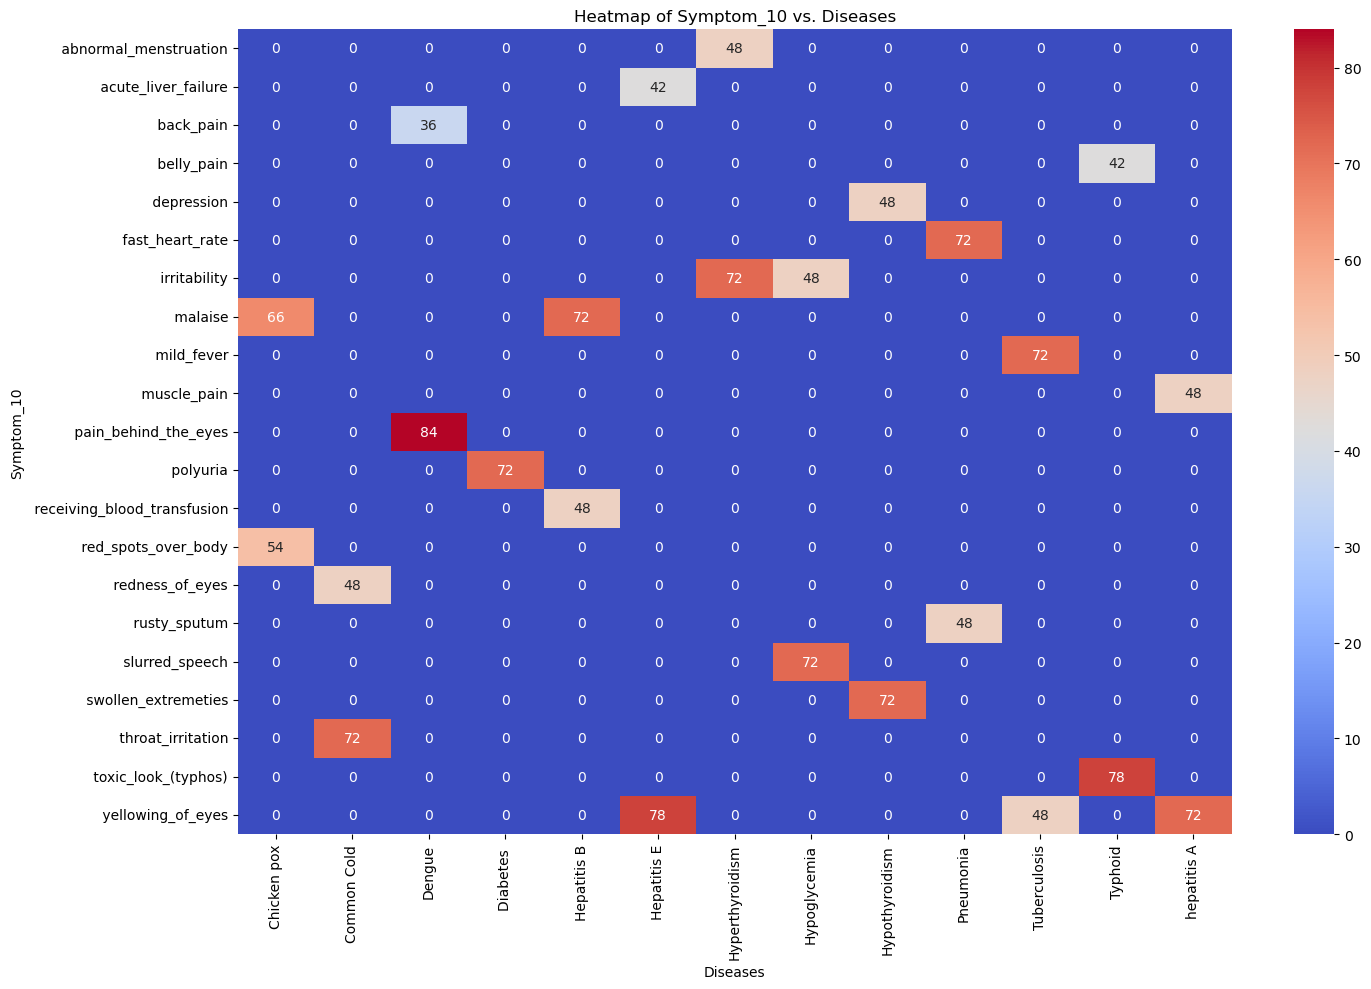

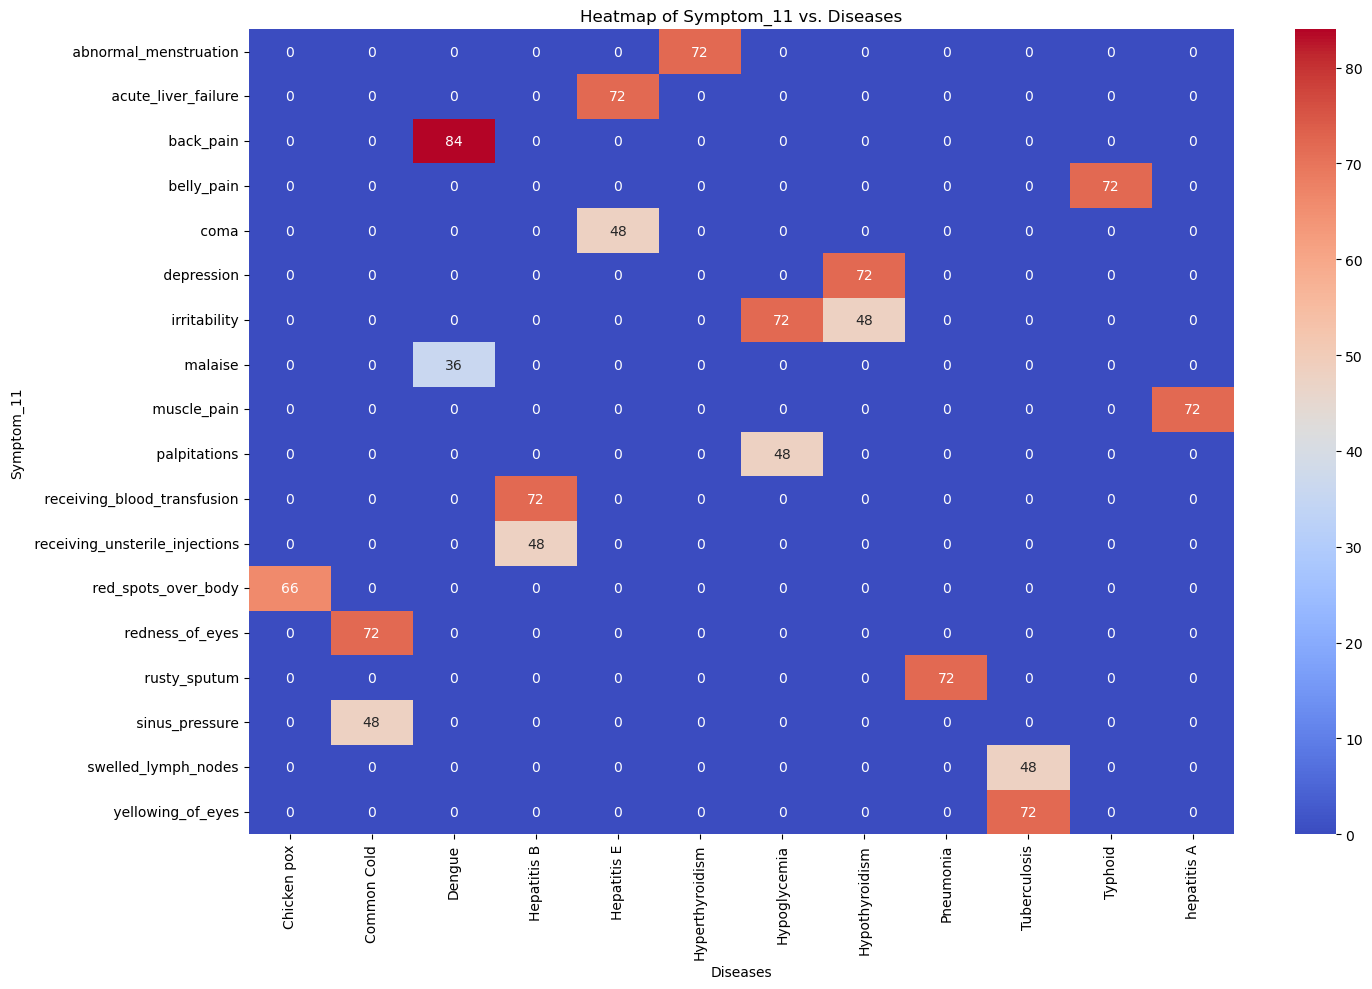

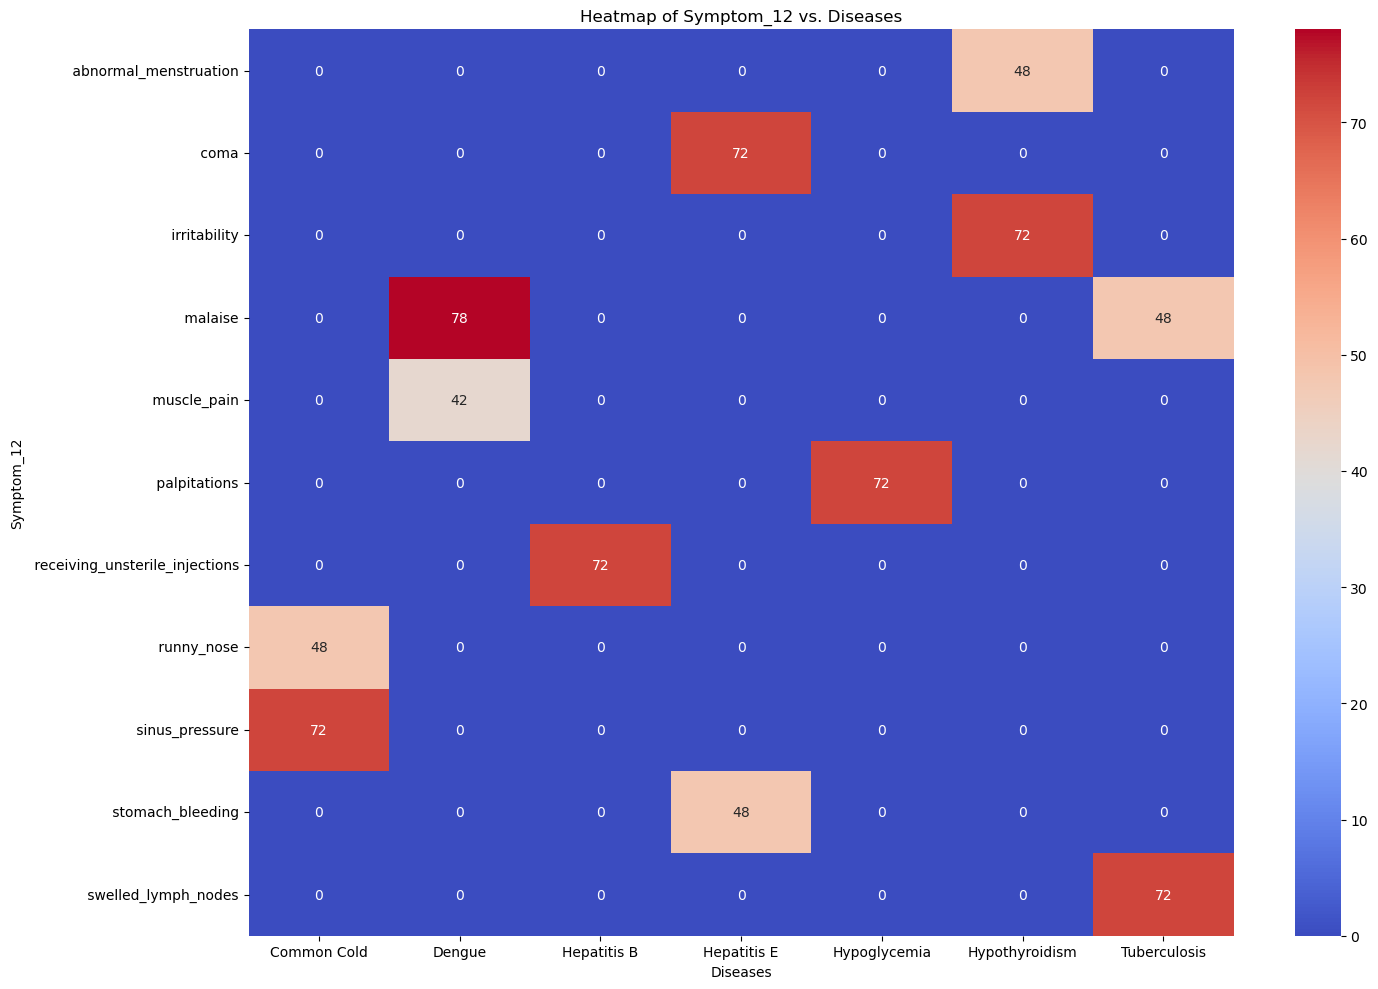

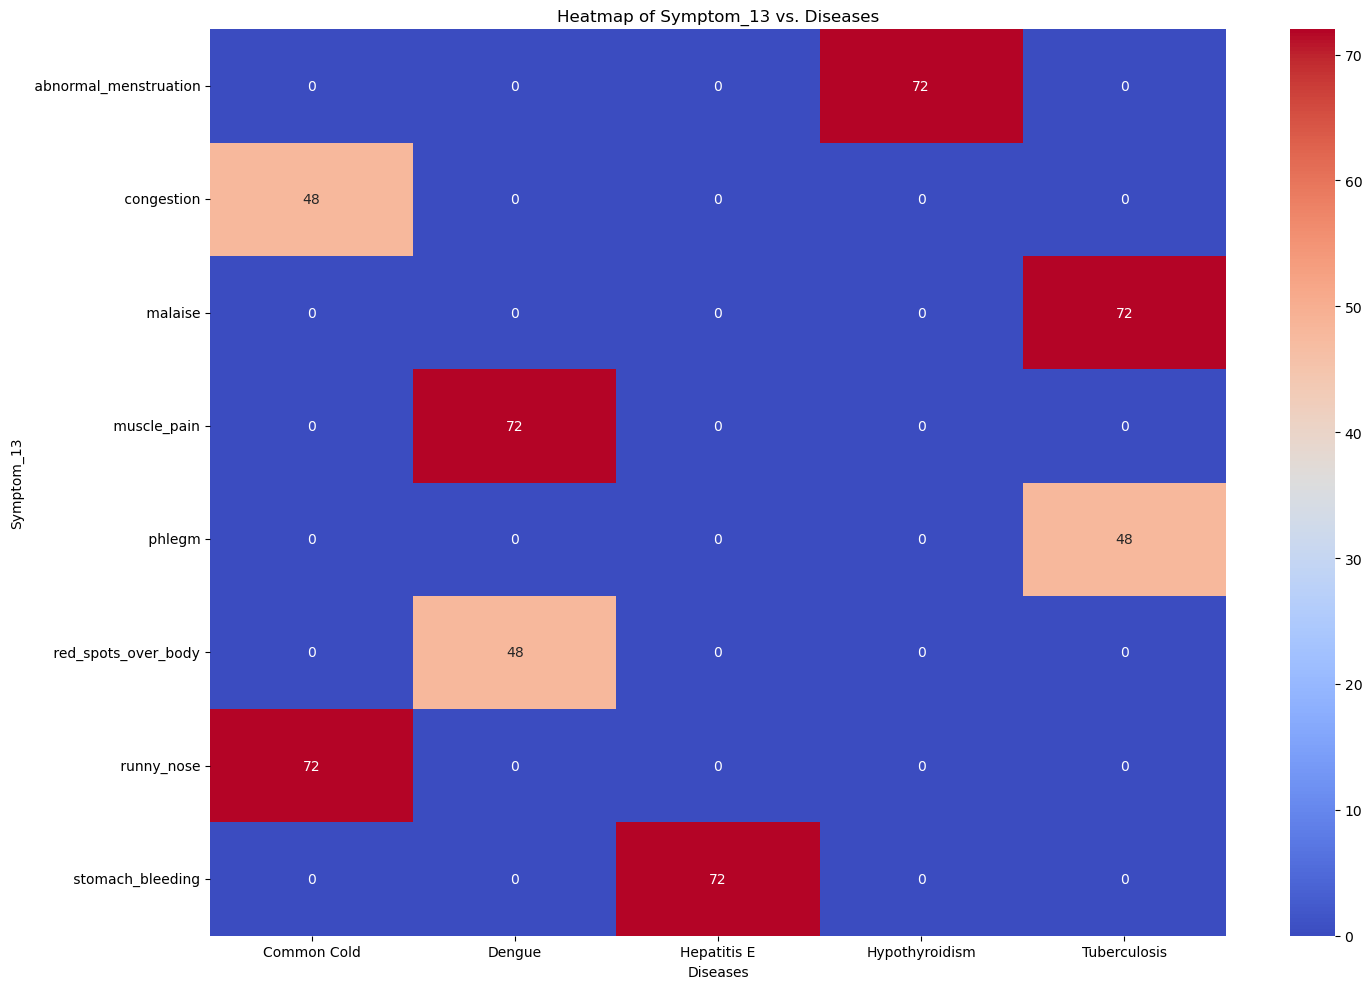

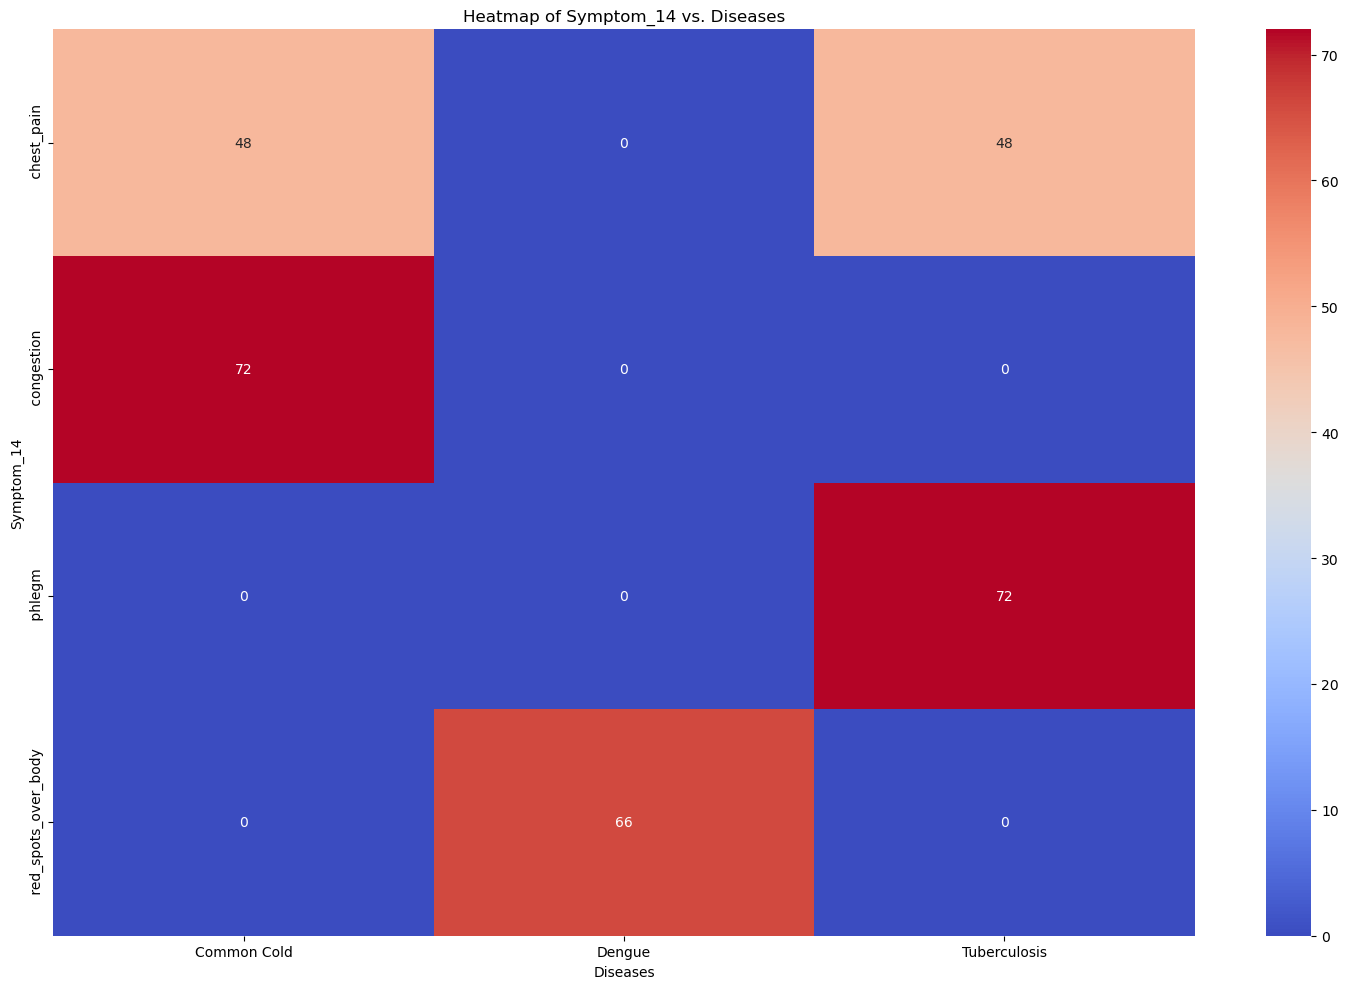

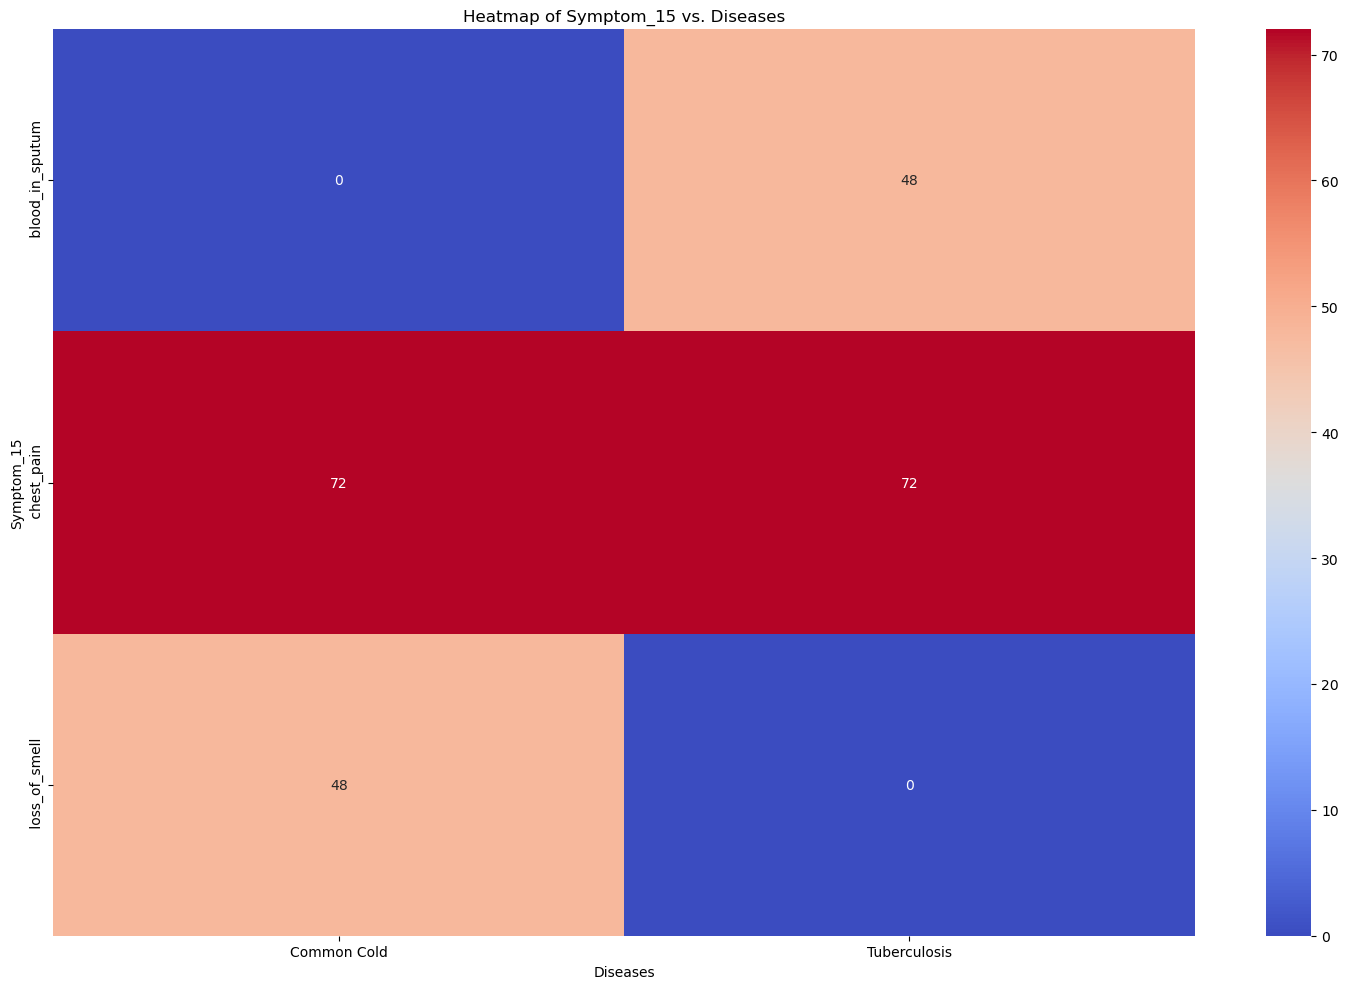

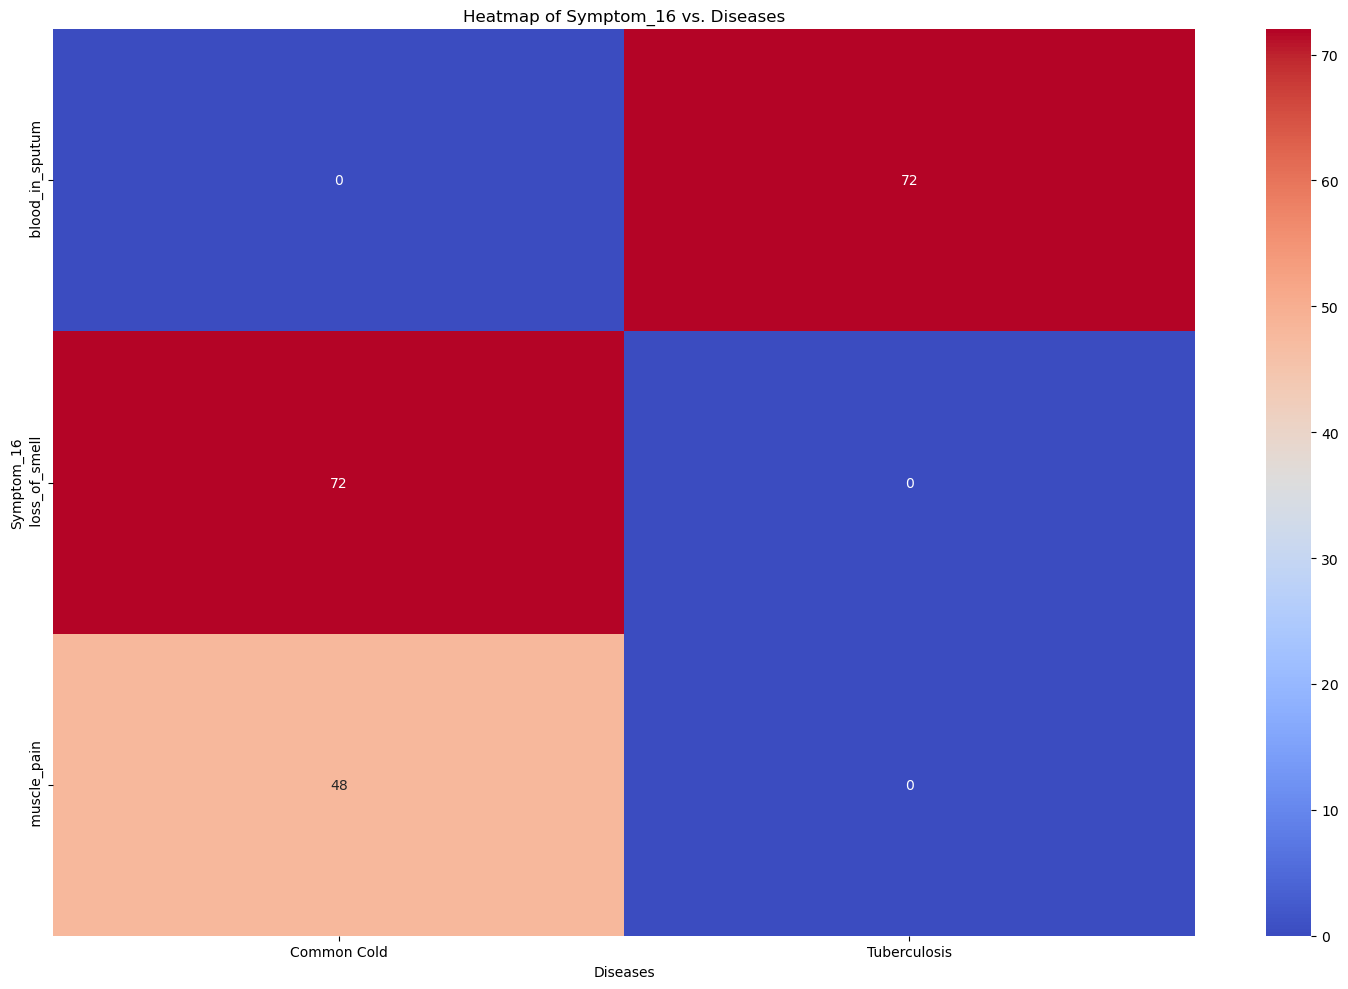

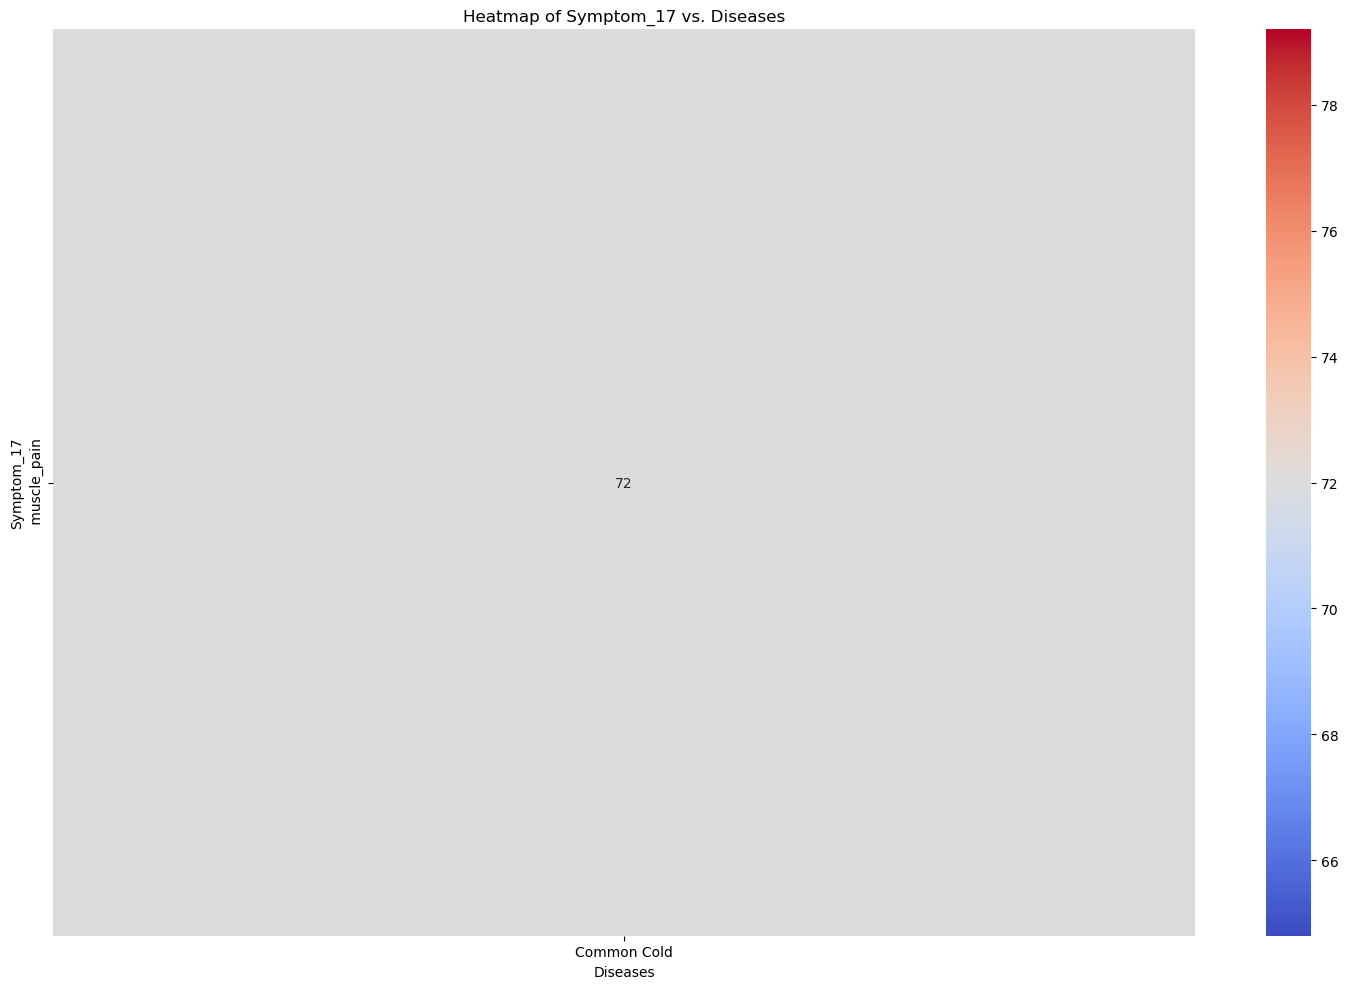

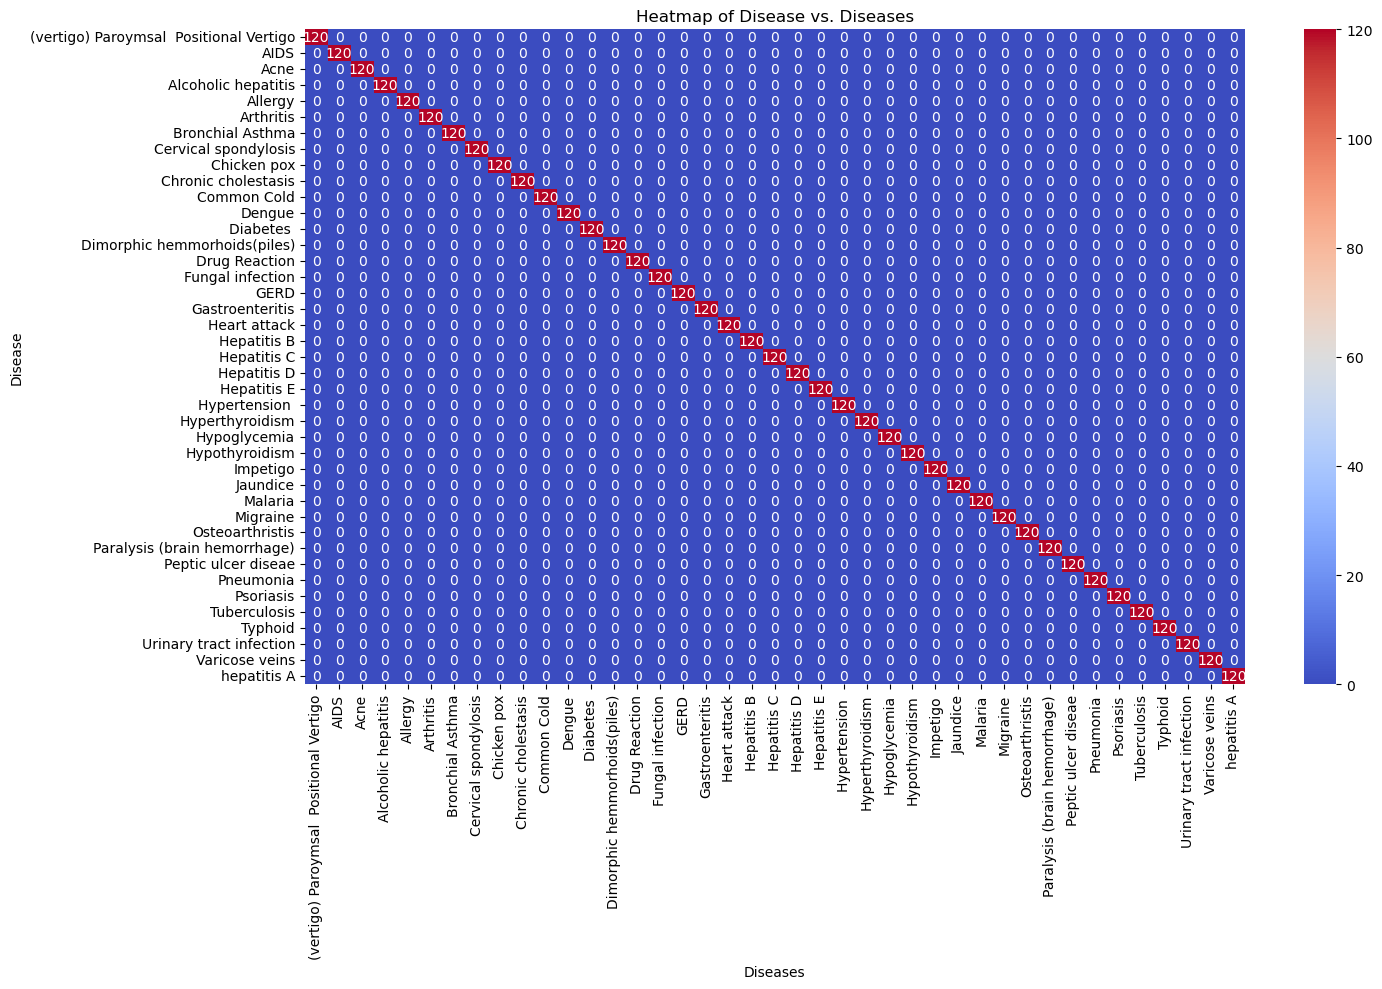

In [18]:
for col in df:
    plt.figure(figsize=(15, 10))
    ct = pd.crosstab(df[col], df['Disease'])
    sns.heatmap(ct, annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Heatmap of {col} vs. Diseases")
    plt.xlabel('Diseases')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Multivariant Analysis Insights:

1. Most Symptoms are not strongly related to each other. They appear **independently** in different cases.
2. A few symptoms show mild relationship (like **Fever** and **Cough** often co-occur in **Flu** cases) they often ocuur together in the same diseases.
3. This **low correlation** between symptoms is good it means each feature may provide **unique information** for predicting disease like if Itching and Rash are observed, Allergy becomes more likely.

## Data Preprocessing

In [19]:
df.shape

(4920, 18)

In [20]:
df.columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17', 'Disease'],
      dtype='object')

#### Here We see that some columns have missing values.

In [21]:
df.isnull().sum()

Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
Disease          0
dtype: int64

In [22]:
df.duplicated().sum()

4616

## Data Cleaning 

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.fillna(0, inplace=True)

In [26]:
df.head(10)

Symptom_1              Symptom_2              Symptom_3  \
0                itching              skin_rash   nodal_skin_eruptions   
1              skin_rash   nodal_skin_eruptions    dischromic _patches   
2                itching   nodal_skin_eruptions    dischromic _patches   
3                itching              skin_rash    dischromic _patches   
4                itching              skin_rash   nodal_skin_eruptions   
10   continuous_sneezing              shivering                 chills   
11             shivering                 chills     watering_from_eyes   
12   continuous_sneezing                 chills     watering_from_eyes   
13   continuous_sneezing              shivering     watering_from_eyes   
14   continuous_sneezing              shivering                 chills   

               Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0    dischromic _patches         0         0         0         0         0   
1                      0         0         0         0         0         0   
2                      0         0         0         0         0         0   
3                      0         0         0         0         0         0   
4                      0         0         0         0         0         0   
10    watering_from_eyes         0         0         0         0         0   
11                     0         0         0         0         0         0   
12                     0         0         0         0         0         0   
13                     0         0         0         0         0         0   
14                     0         0         0         0         0         0   

   Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          0          0          0          0   
10          0          0          0          0          0          0   
11          0          0          0          0          0          0   
12          0          0          0          0          0          0   
13          0          0          0          0          0          0   
14          0          0          0          0          0          0   

   Symptom_16 Symptom_17           Disease  
0           0          0  Fungal infection  
1           0          0  Fungal infection  
2           0          0  Fungal infection  
3           0          0  Fungal infection  
4           0          0  Fungal infection  
10          0          0           Allergy  
11          0          0           Allergy  
12          0          0           Allergy  
13          0          0           Allergy  
14          0          0           Allergy

## Label Encoding

In [27]:
le = LabelEncoder()

In [28]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)  # Convert to string
    df[column] = le.fit_transform(df[column])

In [29]:
mapping = {value: index for index, value in enumerate(le.classes_)}
print(f"Mapping for column '{column}': {mapping}")

Mapping for column 'Disease': {'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


## Train-Test Split

In [30]:
X = df.drop("Disease", axis=1)
y = df["Disease"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
#scaling
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
#Check for unbalancing
X_train_scaled.shape, X_test_scaled.shape

((243, 17), (61, 17))

In [35]:
y_train.shape, y_test.shape

((243,), (61,))

# Machine Learning Model - Random Forest
## Train Model

In [36]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

In [37]:
rf_model.fit(X_train_scaled, y_train)
y_train

196    40
396    35
326    24
173    11
151    29
       ..
61      1
83     17
168     8
186    37
406    27
Name: Disease, Length: 243, dtype: int32

In [38]:
X_train_scaled

array([[-0.25660992,  1.08069702,  1.72211232, ...,  0.2231802 ,
         0.16405125,  0.06428243],
       [ 0.62717889, -0.48287707,  0.99144466, ...,  0.2231802 ,
         0.16405125,  0.06428243],
       [-0.64940494, -0.19859087,  1.65568799, ...,  0.2231802 ,
         0.16405125,  0.06428243],
       ...,
       [ 1.51096769,  0.58319617, -0.40346632, ...,  0.2231802 ,
         0.16405125,  0.06428243],
       [-1.14039872,  1.08069702, -0.40346632, ...,  0.2231802 ,
         0.16405125,  0.06428243],
       [ 0.62717889, -0.62502017, -1.53267997, ...,  0.2231802 ,
         0.16405125,  0.06428243]])

## Model Evaluation

In [39]:
# accuracy on traiining data
X_train_prediction = rf_model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [40]:
print("🎯 Accuracy on Training data :" ,training_data_accuracy*100 )

🎯 Accuracy on Training data : 100.0


In [41]:
#accuracy on test data
X_test_prediction = rf_model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [42]:
print("🎯 Random Forest Accuracy:", test_data_accuracy*100)

🎯 Random Forest Accuracy: 91.80327868852459


In [43]:
print(classification_report(y_test, X_test_prediction, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.00    

In [44]:
joblib.dump(rf_model, "Random_forest_model.pkl")

['Random_forest_model.pkl']

## Artificial Neural Network Model

## Build Neural Network

In [45]:
y_train = le.fit_transform(y_train)
y_train

array([40, 35, 24, 11, 29, 13, 29, 21,  2, 39, 11,  6, 36, 30,  1, 35, 36,
        8, 32, 30, 33, 10, 38, 10, 19, 28, 23, 18, 14,  8, 35, 19, 14, 25,
       39, 18, 33,  0,  5, 16, 13, 22, 35, 16, 34, 12, 31, 17,  6, 12, 12,
        0, 31,  2, 37,  4, 13, 13, 36, 21, 12, 15, 35, 24, 21, 37,  3, 28,
       26, 19, 15,  7, 10,  8, 26, 32,  0, 13,  9, 29, 34, 24, 22, 12, 34,
        9, 40, 28, 40, 16, 30, 11, 18, 38, 21, 29, 23, 11, 19, 31, 11, 17,
       16,  3, 15, 12,  2,  3, 29, 11,  3,  8,  7, 10, 40, 39,  2, 23, 32,
        9, 27,  5, 30, 40, 25,  7, 33, 21,  8, 24, 30, 22, 22, 14,  6, 20,
       25, 40, 30, 10, 38,  5,  3, 30, 11, 36, 26, 16, 26, 34,  4, 38, 21,
       34,  0, 20,  8,  3,  9,  6,  0, 37, 31, 10, 19,  5, 17,  6, 33, 29,
        5,  1,  9, 19,  7, 27,  4, 21, 20, 30, 32, 31, 25, 23, 23, 34, 37,
       37,  4, 24,  6, 11, 36, 28, 31, 28, 36, 33, 14, 19, 22, 25, 16, 26,
       37, 39, 14, 18, 28, 28, 34, 39, 12, 20, 36, 27, 21,  9, 26, 25, 22,
       35, 39, 25, 40,  1

In [46]:
model = Sequential()

In [47]:
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))   #For multi-class classification

In [48]:
adam = Adam(learning_rate=0.005)

In [49]:
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
classes = np.unique(y_train)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights_array))

In [51]:
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

## Train Model

In [52]:
history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=32, 
                    validation_split=0.2, class_weight=class_weight_dict, callbacks=early_stop)     #

Epoch 1/250


7/7 [==============================] - 1s 41ms/step - loss: 3.7138 - accuracy: 0.0619 - val_loss: 3.5608 - val_accuracy: 0.0612
Epoch 2/250
7/7 [==============================] - 0s 7ms/step - loss: 3.5104 - accuracy: 0.0979 - val_loss: 3.3817 - val_accuracy: 0.1224
Epoch 3/250
7/7 [==============================] - 0s 7ms/step - loss: 3.2439 - accuracy: 0.2320 - val_loss: 3.1240 - val_accuracy: 0.1837
Epoch 4/250
7/7 [==============================] - 0s 7ms/step - loss: 3.0048 - accuracy: 0.2062 - val_loss: 2.7940 - val_accuracy: 0.3061
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 2.6654 - accuracy: 0.2784 - val_loss: 2.5055 - val_accuracy: 0.3265
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 2.3971 - accuracy: 0.3402 - val_loss: 2.2370 - val_accuracy: 0.4286
Epoch 7/250
7/7 [==============================] - 0s 7ms/step - loss: 1.9899 - accuracy: 0.4691 - val_loss: 2.0650 - val_accuracy: 0.4286
Epoch 8/250
7/7 [=======

7/7 [==============================] - 0s 7ms/step - loss: 0.7035 - accuracy: 0.7577 - val_loss: 2.2017 - val_accuracy: 0.6531
Epoch 57/250
7/7 [==============================] - 0s 6ms/step - loss: 0.8016 - accuracy: 0.7835 - val_loss: 2.1700 - val_accuracy: 0.6122
Epoch 58/250
7/7 [==============================] - 0s 6ms/step - loss: 0.7848 - accuracy: 0.7938 - val_loss: 2.2757 - val_accuracy: 0.5714
Epoch 59/250
7/7 [==============================] - 0s 7ms/step - loss: 0.6696 - accuracy: 0.7990 - val_loss: 2.4191 - val_accuracy: 0.5714
Epoch 60/250
7/7 [==============================] - 0s 6ms/step - loss: 0.7176 - accuracy: 0.7680 - val_loss: 2.3122 - val_accuracy: 0.5510
Epoch 61/250
7/7 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.7990 - val_loss: 2.2663 - val_accuracy: 0.5714
Epoch 62/250
7/7 [==============================] - 0s 5ms/step - loss: 0.7881 - accuracy: 0.7526 - val_loss: 2.1936 - val_accuracy: 0.6531
Epoch 63/250
7/7 [===============

## Model Evaluation

In [53]:
train_loss, train_accuracy  = model.evaluate(X_train_scaled, y_train, verbose=1)
print("Train Accuracy:", train_accuracy*100)

8/8 [==============================] - 0s 1ms/step - loss: 0.6319 - accuracy: 0.8189
Train Accuracy: 81.89300298690796


In [54]:
y_train_pred = model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred.argmax(axis=1)))

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         4
           3       0.86      1.00      0.92         6
           4       0.60      0.75      0.67         4
           5       0.83      1.00      0.91         5
           6       0.75      1.00      0.86         6
           7       1.00      0.80      0.89         5
           8       1.00      0.88      0.93         8
           9       1.00      0.67      0.80         6
          10       1.00      1.00      1.00         7
          11       1.00      0.88      0.93         8
          12       1.00      0.86      0.92         7
          13       1.00      1.00      1.00         5
          14       0.67      0.40      0.50         5
          15       0.33      0.25      0.29         4
          16       1.00      0

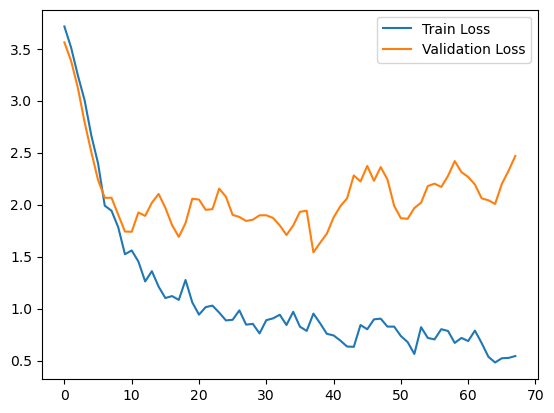

In [55]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

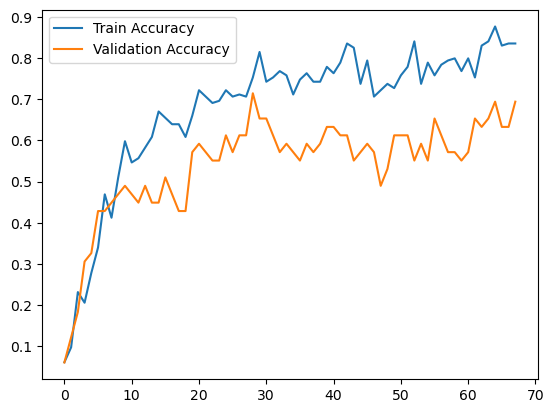

In [56]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [57]:
test_loss, test_accuracy  = model.evaluate(X_test_scaled, y_test, verbose=1)
print("\n Test Accuracy:", test_accuracy*100)

2/2 [==============================] - 0s 6ms/step - loss: 1.4156 - accuracy: 0.7213

 Test Accuracy: 72.13114500045776


In [58]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred.argmax(axis=1)))

2/2 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1
          14       0.50      1.00      0.67         1
          15       0.00      0.00      0.00         1
          16       0.00      0

## StreamLit UI

In [ ]:
code = """
import streamlit as st
import joblib

model = joblib.load("Random_forest_model.pkl")


disease_mapping = {
        0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis',
        4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis',
        8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue',
        12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction',
        15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack',
        19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E',
        23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism',
        27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis',
        32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia',
        35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection',
        39: 'Varicose veins', 40: 'hepatitis A'
}

symptom_list = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
               'shivering', 'chills', 'stomach_pain', 'acidity', 
               'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
               'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets']


#Streamlit UI Design 
st.set_page_config(page_title="Smart Diagnosis", layout="wide")

st.title("🧠 Smart Medical Diagnosis")
st.markdown("### 👨‍⚕️ Doctor-Trusted Symptom Checker")


selected_symptoms= st.multiselect("🔍Select Symptoms: ", symptom_list)

#Prediction Button 
if st.button("🩺Predict Disease"):
    if selected_symptoms:
        input_data = [1 if symptom in selected_symptoms else 0 for symptom in symptom_list]
        
        prediction_encoded = model.predict([input_data])[0]
        predicted_disease = disease_mapping.get(prediction_encoded, "Unknown Disease")
        
        st.success(f"🎯 Predicted Disease: **{predicted_disease}**")
        
        recommendations = {
            '(vertigo) Paroymsal Positional Vertigo' : "Perform targeted vestibular exercises and avoid rapid head movements; consult your ENT specialist if episodes persist.",
            'AIDS' : "Strictly follow your antiretroviral therapy, maintain a balanced diet, and have regular check-ups to monitor your immune status.",
            'Acne' : "Maintain a gentle skincare routine, avoid harsh products, and consider seeing a dermatologist for persistent breakouts.",
            'Alcoholic hepatitis' : "Abstain from alcohol immediately and adhere to a specialized treatment plan and liver-friendly diet under your doctor’s guidance.",
            'Allergy' : "Identify and avoid known allergens, use antihistamines as needed, and consider professional advice for long-term management.",
            'Arthritis' : "Engage in low-impact exercises, incorporate anti-inflammatory foods in your diet, and use pain management strategies as advised by your doctor.",
            'Bronchial Asthma' : "Follow your inhaler regimen without fail, avoid known triggers, and monitor symptoms regularly with your pulmonologist’s help.",
            'Cervical spondylosis' : "Practice proper posture, perform neck-strengthening exercises, and use prescribed therapies to alleviate discomfort.",
            'Chicken pox' : "Rest well, stay hydrated, use soothing lotions for itching, and isolate yourself to prevent spreading the virus.",
            'Chronic cholestasis' : "Follow your doctor’s treatment plan, monitor liver function tests regularly, and adhere to dietary recommendations that reduce liver strain.",
            'Common Cold' : "Rest, keep yourself well-hydrated, and use over-the-counter remedies to ease symptoms while your body recovers.",
            'Dengue' : "Stay hydrated, use paracetamol for fever (avoiding NSAIDs), and seek medical care promptly if symptoms worsen.",
            'Diabetes ' : "Monitor your blood sugar levels consistently, follow dietary and exercise guidelines, and take medications as prescribed.",
            'Dimorphic hemmorhoids(piles)' : "Increase your fiber intake, drink plenty of water, and use topical treatments or seek medical advice to ease discomfort.",
            'Drug Reaction' : "Discontinue the suspected medication immediately and consult your healthcare provider for proper evaluation and treatment.",
            'Fungal infection' : "Maintain good hygiene, keep affected areas dry, and apply antifungal medications as directed by your doctor.",
            'GERD' : "Avoid trigger foods, eat smaller meals, and consider lifestyle modifications alongside your prescribed acid-reducing treatments.",
            'Gastroenteritis' : "Stay well-hydrated with oral rehydration solutions, follow a bland diet, and rest until your symptoms improve.",
            'Heart attack' : "Follow your cardiologist’s rehabilitation program, adopt a heart-healthy lifestyle, and strictly adhere to your medication schedule.",
            'Hepatitis B' : "Stick to your antiviral regimen, monitor your liver function regularly, and maintain lifestyle adjustments that support liver health.",
            'Hepatitis C' : "Complete your full course of antiviral therapy, keep regular appointments for liver monitoring, and consider dietary modifications for overall wellness.",
            'Hepatitis D' : "Follow your doctor's treatment plan diligently, avoid alcohol, and have regular liver function evaluations to manage your condition.",
            'Hepatitis E' : "Rest, maintain proper hydration, and follow your healthcare provider’s recommendations for supportive recovery of liver function.",
            'Hypertension ' : "Monitor your blood pressure at home, reduce sodium intake, exercise regularly, and take your antihypertensive medications as prescribed.",
            'Hyperthyroidism' : "Adhere to your prescribed treatment plan, avoid stimulants that exacerbate symptoms, and have your thyroid levels monitored regularly.",
            'Hypoglycemia' : "Eat balanced, frequent meals that include complex carbohydrates, keep quick-sugar snacks available, and adjust medications only as advised by your doctor.",
            'Hypothyroidism' : "Take your thyroid hormone replacement consistently, have your levels checked periodically, and maintain a balanced diet to support overall health.",
            'Impetigo' : "Keep the affected area clean, avoid scratching, and use the prescribed topical or oral antibiotics to contain the infection.",
            'Jaundice' : "Follow your physician’s advice for liver support, maintain adequate hydration, and avoid strenuous activities while recovering.",
            'Malaria' : "Complete the full course of antimalarial medications, ensure rest and hydration, and seek medical attention if symptoms do not improve.",
            'Migraine' : "Identify and avoid known triggers, rest in a quiet darkened room during episodes, and use your prescribed migraine medications for relief.",
            'Osteoarthristis' : "Engage in gentle, regular exercises, manage your weight, and use pain relief strategies as recommended by your healthcare provider.",
            'Paralysis (brain hemorrhage)' : "Participate in a comprehensive rehabilitation program with physical and occupational therapy under close medical supervision.",
            'Peptic ulcer diseae' : "Avoid spicy and acidic foods, follow your medication regimen, and adopt stress-reduction techniques to support ulcer healing.",
            'Pneumonia' : "Complete your prescribed antibiotics, get plenty of rest, and monitor your breathing while following up with your doctor for recovery.",
            'Psoriasis' : "Maintain a regular skincare routine, manage stress, and explore treatment options like topical therapies or light therapy under your dermatologist’s care.",
            'Tuberculosis' : "Strictly adhere to the full course of TB medications, ensure proper nutrition, and attend all follow-up appointments to track your progress.",
            'Typhoid' : "Complete your prescribed antibiotics, maintain good hydration and sanitation, and follow dietary advice during the illness recovery.",
            'Urinary tract infection' : "Drink plenty of water, complete your full course of antibiotics, and practice proper hygiene to reduce the risk of recurrence.",
            'Varicose veins' : "Elevate your legs when resting, engage in regular low-impact exercises, and discuss options like compression stockings with your specialist.",
            'hepatitis A' : "Rest adequately, follow a light and nutritious diet, stay hydrated, and adhere to your healthcare provider’s advice for liver recovery."
        }
        
        recommendation = recommendations.get(predicted_disease, "Please consult a doctor for further evaluation.")
        st.info(f"💡 Recommendation: {recommendation}")
    else:
        st.warning("⚠️ Please select at least one symptom to proceed.")

st.markdown("---")
st.caption("© 2025 Smart Diagnosis | Built for educational and assistive purposes.")


"""

with open("app.py", "w", encoding="utf-8") as file:
    file.write(code)

In [ ]:
!streamlit run app.py